# Loading and Settings

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, date
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

<hr>

# General Data Exploration

In [3]:
df_base = pd.read_excel("dataset.xlsx")

Dataset info

In [4]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CASE_WID                  1710 non-null   float64       
 1   CASE_NUM                  1710 non-null   object        
 2   SRV_PLAN_WID              1710 non-null   float64       
 3   PLAN_NAME                 1710 non-null   object        
 4   SRV_PLAN_STATUS_CD        1710 non-null   object        
 5   TOTAL_COST_AMT            1185 non-null   float64       
 6   SERVICE_WID               1710 non-null   float64       
 7   SERVICE                   1710 non-null   object        
 8   SUB_SERVICE               1710 non-null   object        
 9   SERVICE_STATUS_CD         1710 non-null   object        
 10  SERVICE_START_DATE        1710 non-null   datetime64[ns]
 11  SERVICE_END_DATE          1665 non-null   datetime64[ns]
 12  OUTCOME_FEES_PAID_AM

- All columns contain null values. The majority of them have only three null values.

In [5]:
df_base[df_base.CASE_WID.isna()]

,CASE_WID,CASE_NUM,SRV_PLAN_WID,PLAN_NAME,SRV_PLAN_STATUS_CD,TOTAL_COST_AMT,SERVICE_WID,SERVICE,SUB_SERVICE,SERVICE_STATUS_CD,SERVICE_START_DATE,SERVICE_END_DATE,OUTCOME_FEES_PAID_AMT,SERVICE_SUPPORT_COST_AMT,CLIENT_TYPE_WID,CLIENT_TYPE_CD,CLIENT_TYPE,BIRTH_DATE,GENDER,EDUCATION_LEVEL
274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- After examining null values in the `CASE_WID` column, it's evident that the entire row is null. Therefore, we can proceed by removing that particular row from the dataset.

In [6]:
df_base = df_base[df_base['CASE_WID'].notna()]
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 0 to 1712
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CASE_WID                  1710 non-null   float64       
 1   CASE_NUM                  1710 non-null   object        
 2   SRV_PLAN_WID              1710 non-null   float64       
 3   PLAN_NAME                 1710 non-null   object        
 4   SRV_PLAN_STATUS_CD        1710 non-null   object        
 5   TOTAL_COST_AMT            1185 non-null   float64       
 6   SERVICE_WID               1710 non-null   float64       
 7   SERVICE                   1710 non-null   object        
 8   SUB_SERVICE               1710 non-null   object        
 9   SERVICE_STATUS_CD         1710 non-null   object        
 10  SERVICE_START_DATE        1710 non-null   datetime64[ns]
 11  SERVICE_END_DATE          1665 non-null   datetime64[ns]
 12  OUTCOME_FEES_PAID_AM

In [7]:
def perc_null(df):    
    percentual = df.isnull().mean()*100
    col='Amount Null Values (%)'
    dist_freq_qualitativas = pd.DataFrame({col: percentual})
    
    return (
        dist_freq_qualitativas.style
        .background_gradient(subset=col, cmap="Greys")
    )

# Filter columns with null values
perc_null(df_base[[col for col in df_base.columns if df_base[col].isnull().sum() > 0]])

,Amount Null Values (%)
TOTAL_COST_AMT,30.701754
SERVICE_END_DATE,2.631579
OUTCOME_FEES_PAID_AMT,74.035088
SERVICE_SUPPORT_COST_AMT,74.035088


In [8]:
df_base.head(2)

,CASE_WID,CASE_NUM,SRV_PLAN_WID,PLAN_NAME,SRV_PLAN_STATUS_CD,TOTAL_COST_AMT,SERVICE_WID,SERVICE,SUB_SERVICE,SERVICE_STATUS_CD,SERVICE_START_DATE,SERVICE_END_DATE,OUTCOME_FEES_PAID_AMT,SERVICE_SUPPORT_COST_AMT,CLIENT_TYPE_WID,CLIENT_TYPE_CD,CLIENT_TYPE,BIRTH_DATE,GENDER,EDUCATION_LEVEL
0,1212405872.00,1-60253862061,888506203.00,Employment Sevices,Closed,19600.00,2523451994.00,Self-Employment,Business Launch & Implementation,Closed,2020-04-26,2021-01-16,NaN,NaN,1.00,BCEA EO,BCEA EO,03/Jan/1982,Woman/Girl,Secondary
1,1222328554.00,1-60663637034,885614879.00,Employment Sevices,Closed,525.00,2592189464.00,Client Needs Assessment,Client Needs Assessment,Closed,2020-01-30,2020-05-08,NaN,NaN,12.00,NEO PWD REACHBACK,BCEA NEO PWD and EI Reachback,07/Mar/1976,Woman/Girl,College


- Now that we've identified the remaining null values in the following columns:
    - `TOTAL_COST_AMT`
    - `SERVICE_END_DATE`
    - `OUTCOME_FEES_PAID_AMT`
    - `SERVICE_SUPPORT_COST_AMT`

- It does make sense, but I'll explore these columns later to determine the best way to handle the null values.
- Another consideration is `BIRTH_DATE` is an object and not a datetime. Would be relevant to convert it as datetime.

In [9]:
df_base["BIRTH_DATE"]=pd.to_datetime(df_base['BIRTH_DATE'])

In [10]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 0 to 1712
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CASE_WID                  1710 non-null   float64       
 1   CASE_NUM                  1710 non-null   object        
 2   SRV_PLAN_WID              1710 non-null   float64       
 3   PLAN_NAME                 1710 non-null   object        
 4   SRV_PLAN_STATUS_CD        1710 non-null   object        
 5   TOTAL_COST_AMT            1185 non-null   float64       
 6   SERVICE_WID               1710 non-null   float64       
 7   SERVICE                   1710 non-null   object        
 8   SUB_SERVICE               1710 non-null   object        
 9   SERVICE_STATUS_CD         1710 non-null   object        
 10  SERVICE_START_DATE        1710 non-null   datetime64[ns]
 11  SERVICE_END_DATE          1665 non-null   datetime64[ns]
 12  OUTCOME_FEES_PAID_AM

Dictionary:
- WID = An Oracle column or row type ID.  When data is queried from a data warehouse, one might see this column extension.
- NUM = Number
- SRV = Service
- CD = Code (this is an Oracle standard syntax for code columns)
- AMT = Amount

Since I currently don't have a detailed data dictionary, I've been inferring the meaning of each column based on the above sample, data types, column names, and relevant information received via email:
- `CASE_WID`: *Case Id*
- `CASE_NUM`: *Case Number*
- `SRV_PLAN_WID`: *Service Plan Id*
- `PLAN_NAME`: *Service Plan Name*
- `SRV_PLAN_STATUS_CD`: *Service Plan Status*
- `TOTAL_COST_AMT`: *Amount of Total Cost*
- `SERVICE_WID`: *Service Id*
- `SERVICE`: *Service Name*
- `SUB_SERVICE`: *Sub Service Name*
- `SERVICE_STATUS_CD`: *Service Status*
- `SERVICE_START_DATE`: *Service Start Date*
- `SERVICE_END_DATE`: *Service End Date*
- `OUTCOME_FEES_PAID_AMT`: *Amount of Outcome Fees Paid*
- `SERVICE_SUPPORT_COST_AMT`: *Amount of Service Support Cost*
- `CLIENT_TYPE_WID`: *Client Type Id*
- `CLIENT_TYPE_CD`: *Client Type*
- `CLIENT_TYPE`: *Client Type*
- `BIRTH_DATE`: *Client Birth Date*
- `GENDER`: *Client Gender*
- `EDUCATION_LEVEL`: *Client Education Level*

- Number of unique values for each column

In [11]:
for col in df_base.columns:
    print(f'{col}: {df_base[col].nunique()}')

CASE_WID: 1689
CASE_NUM: 1689
SRV_PLAN_WID: 1691
PLAN_NAME: 2
SRV_PLAN_STATUS_CD: 2
TOTAL_COST_AMT: 789
SERVICE_WID: 1710
SERVICE: 13
SUB_SERVICE: 46
SERVICE_STATUS_CD: 6
SERVICE_START_DATE: 858
SERVICE_END_DATE: 945
OUTCOME_FEES_PAID_AMT: 33
SERVICE_SUPPORT_COST_AMT: 230
CLIENT_TYPE_WID: 18
CLIENT_TYPE_CD: 16
CLIENT_TYPE: 16
BIRTH_DATE: 1436
GENDER: 5
EDUCATION_LEVEL: 6


- I've found that only the `SERVICE_WID` column has the same number of unique values as the dataset length. I'll proceed to use it as the main identifier for our dataset. Additionally, to enhance data visualization and organization, I'll reorder the columns. This should make it easier to interpret and work with the data. 

In [12]:
df_base = df_base[['SERVICE_WID','SERVICE','SUB_SERVICE','SERVICE_STATUS_CD','SRV_PLAN_WID','PLAN_NAME','SRV_PLAN_STATUS_CD','SERVICE_START_DATE','SERVICE_END_DATE','CASE_WID','CASE_NUM','TOTAL_COST_AMT','OUTCOME_FEES_PAID_AMT','SERVICE_SUPPORT_COST_AMT','CLIENT_TYPE_WID','CLIENT_TYPE_CD','CLIENT_TYPE','BIRTH_DATE','GENDER','EDUCATION_LEVEL']]
df_base.head(2)

,SERVICE_WID,SERVICE,SUB_SERVICE,SERVICE_STATUS_CD,SRV_PLAN_WID,PLAN_NAME,SRV_PLAN_STATUS_CD,SERVICE_START_DATE,SERVICE_END_DATE,CASE_WID,CASE_NUM,TOTAL_COST_AMT,OUTCOME_FEES_PAID_AMT,SERVICE_SUPPORT_COST_AMT,CLIENT_TYPE_WID,CLIENT_TYPE_CD,CLIENT_TYPE,BIRTH_DATE,GENDER,EDUCATION_LEVEL
0,2523451994.00,Self-Employment,Business Launch & Implementation,Closed,888506203.00,Employment Sevices,Closed,2020-04-26,2021-01-16,1212405872.00,1-60253862061,19600.00,NaN,NaN,1.00,BCEA EO,BCEA EO,1982-01-03,Woman/Girl,Secondary
1,2592189464.00,Client Needs Assessment,Client Needs Assessment,Closed,885614879.00,Employment Sevices,Closed,2020-01-30,2020-05-08,1222328554.00,1-60663637034,525.00,NaN,NaN,12.00,NEO PWD REACHBACK,BCEA NEO PWD and EI Reachback,1976-03-07,Woman/Girl,College


<hr>

# Exploring Values

In [13]:
def freq(df_s, col=None):
    if type(df_s) == pd.core.series.Series:
        val = df_s.value_counts()
        percent = df_s.value_counts(normalize = True) * 100
    else:
        val = df_s[col].value_counts()
        percent = df_s[col].value_counts(normalize = True) * 100
    dist_freq_qualitativas = pd.DataFrame({'Amount': val, 'Percent (%)': percent})        

    return (
        dist_freq_qualitativas.style
        .background_gradient(subset='Percent (%)', cmap="Greys")
    )

def cross_categories(df, column1, column2):
    if type(column1) == str:
        if len(df[column2].dropna().unique()) < len(df[column1].dropna().unique()):
            column1, column2 = column2, column1
        df_aux = pd.crosstab(df[column1],df[column2])
    else:
        if len(column2.dropna().unique()) < len(column1.dropna().unique()):
            column1, column2 = column2, column1
        df_aux = pd.crosstab(column1,column2)
    display(df_aux.style.background_gradient(axis=None, vmin=0, vmax=df_aux.max().max(), cmap="Greys"))

## By Services

### Plan Name

,Amount,Percent (%)
Employment Sevices,1526,89.239766
Self-Serve,184,10.760234


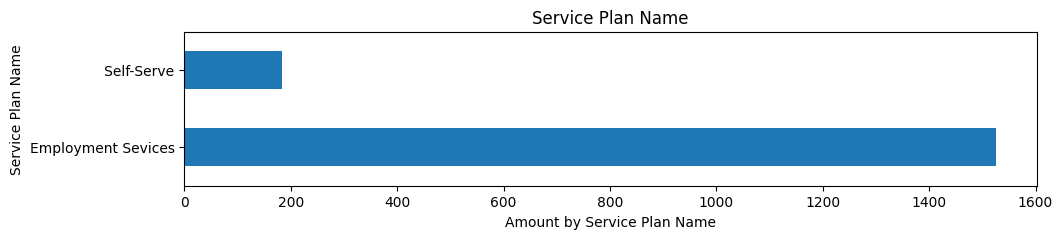

In [14]:
fig = df_base['PLAN_NAME'].value_counts().plot.barh(figsize=(11,2))
fig.set_title('Service Plan Name')
fig.set_ylabel('Service Plan Name')
fig.set_xlabel('Amount by Service Plan Name')

freq(df_base,"PLAN_NAME")

- **Employment Services** is the most prominent category.

### Service Plan Status

,Amount,Percent (%)
Closed,1093,63.918129
Open,617,36.081871


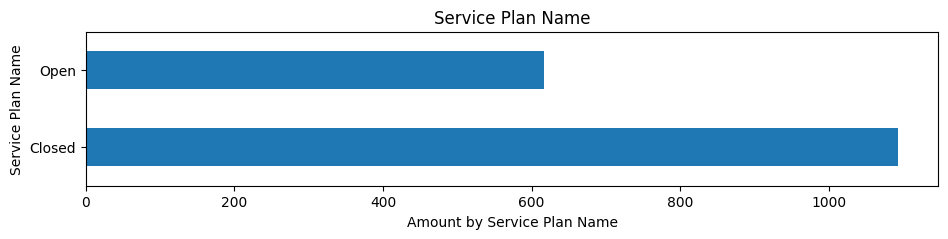

In [15]:
fig = df_base['SRV_PLAN_STATUS_CD'].value_counts().plot.barh(figsize=(11,2))
fig.set_title('Service Plan Name')
fig.set_ylabel('Service Plan Name')
fig.set_xlabel('Amount by Service Plan Name')

freq(df_base,"SRV_PLAN_STATUS_CD")

- **Closed** is the most prominent category.

### Service

,Amount,Percent (%)
Client Needs Assessment,424,24.795322
Skills Enhancement - ESS Workshops,328,19.181287
Job Search,306,17.894737
Job Sustainment,196,11.461988
Self-Serve Services,188,10.994152
Skills Enhancement - STOC,79,4.619883
Work Experience,48,2.807018
Skills Enhancement - Training Services,40,2.339181
External Referrals,40,2.339181
Specialized Assessments,34,1.988304


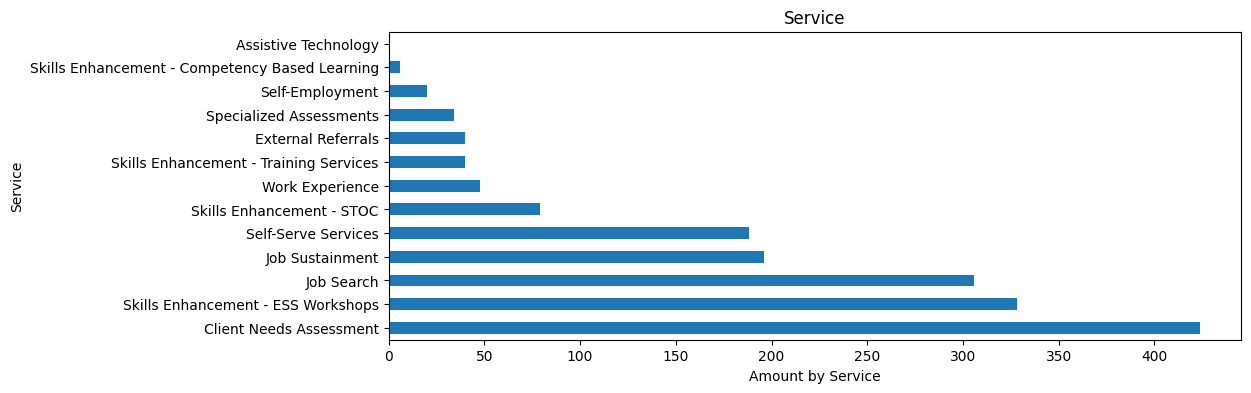

In [16]:
fig = df_base['SERVICE'].value_counts().plot.barh(figsize=(11,4))
fig.set_title('Service')
fig.set_ylabel('Service')
fig.set_xlabel('Amount by Service')

freq(df_base,"SERVICE")

- **Client Needs Assessment** is the most prominent category.

### Sub Service

,Amount,Percent (%)
Client Needs Assessment,424,24.795322
Job Search,306,17.894737
Job Sustainment,196,11.461988
Find Jobs or Work Experience Workshop,164,9.590643
Self-Serve Services,138,8.070175
Prepare for Employment Workshop,119,6.959064
Essential Work Skills Workshop,31,1.812865
Self-Serve Job Sustainment,28,1.637427
Other,27,1.578947
Wage Subsidy Work Experience,25,1.461988


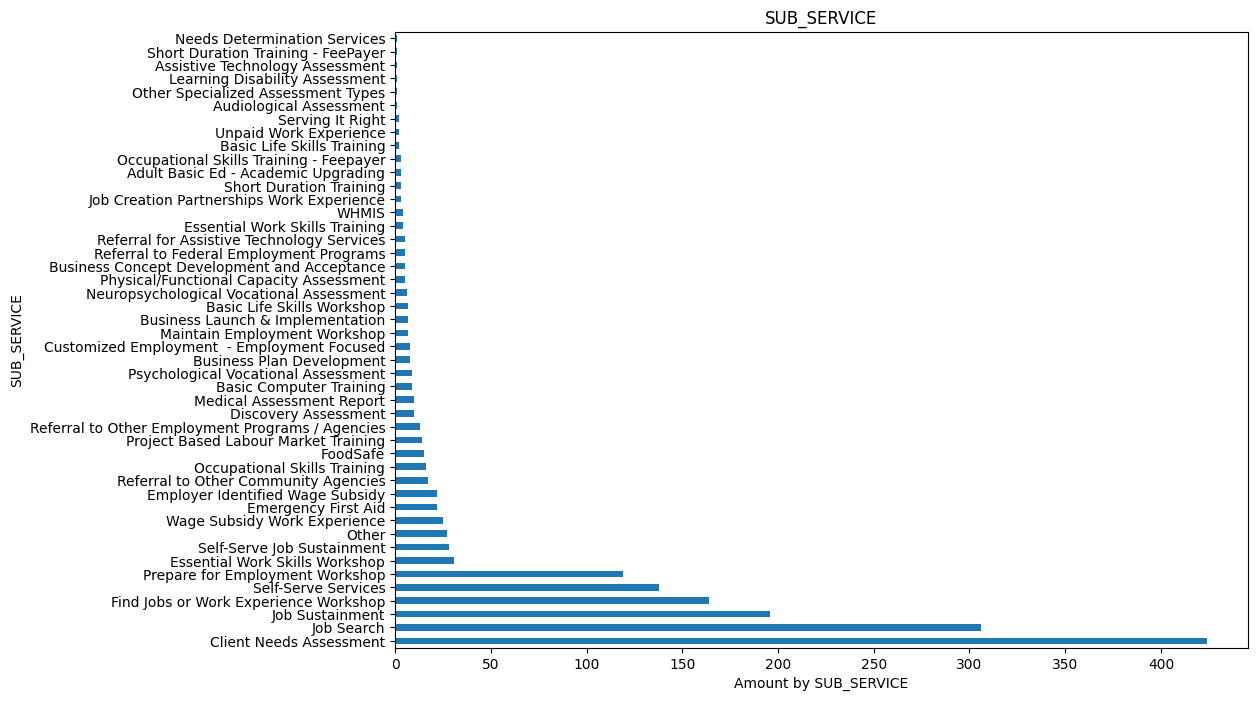

In [17]:
fig = df_base['SUB_SERVICE'].value_counts().plot.barh(figsize=(11,8))
fig.set_title('SUB_SERVICE')
fig.set_ylabel('SUB_SERVICE')
fig.set_xlabel('Amount by SUB_SERVICE')

freq(df_base,"SUB_SERVICE")

- **Client Needs Assessment** is the most prominent category.

### Service Status

,Amount,Percent (%)
Closed,1362,79.649123
In Progress,154,9.005848
Cancelled,122,7.134503
Set Up,37,2.163743
Ended Delivery,31,1.812865
Waiting To Start,4,0.233918


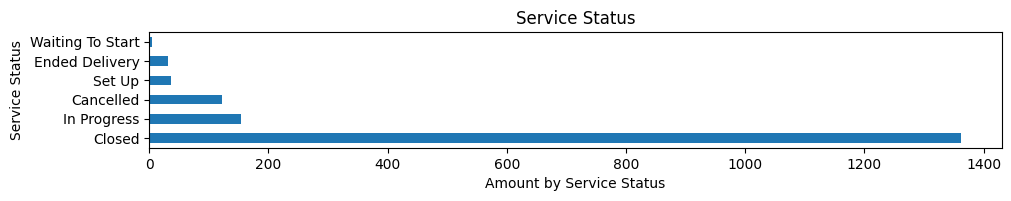

In [18]:
fig = df_base['SERVICE_STATUS_CD'].value_counts().plot.barh(figsize=(11,1.5))
fig.set_title('Service Status')
fig.set_ylabel('Service Status')
fig.set_xlabel('Amount by Service Status')

freq(df_base,"SERVICE_STATUS_CD")

- **Closed** is the most prominent category.

### Service Date

In [19]:
# Checking if there is some SERVICE_START_DATE greater than SERVICE_END_DATE
df_base.query("SERVICE_START_DATE > SERVICE_END_DATE").shape

(0, 20)

In [20]:
pos = df_base.columns.get_loc('SERVICE_END_DATE')
df_base.insert(pos+1,"SERVICE_END_YEAR",np.nan)
df_base.insert(pos+1,"SERVICE_END_MONTH",np.nan)
df_base.insert(pos+1,"SERVICE_START_YEAR",np.nan)
df_base.insert(pos+1,"SERVICE_START_MONTH",np.nan)
df_base['SERVICE_START_YEAR'] = df_base['SERVICE_START_DATE'].dt.year
df_base['SERVICE_END_YEAR'] = df_base['SERVICE_END_DATE'].dt.year
df_base['SERVICE_START_MONTH'] = df_base['SERVICE_START_DATE'].dt.month
df_base['SERVICE_END_MONTH'] = df_base['SERVICE_END_DATE'].dt.month

cross_categories(df_base,'SERVICE_START_YEAR','SERVICE_START_MONTH')
cross_categories(df_base,df_base['SERVICE_END_YEAR'].dropna().astype(int),df_base['SERVICE_END_MONTH'].dropna().astype(int))

SERVICE_START_MONTH,1,2,3,4,5,6,7,8,9,10,11,12
SERVICE_START_YEAR,,,,,,,,,,,,
2019,0,0,0,26,34,28,53,37,42,47,58,45
2020,43,51,47,22,13,27,19,28,32,35,31,23
2021,29,38,45,32,38,33,32,28,34,30,33,24
2022,32,31,45,35,38,42,37,24,40,35,57,32
2023,32,39,41,12,1,0,0,0,0,0,0,0


SERVICE_END_MONTH,1,2,3,4,5,6,7,8,9,10,11,12
SERVICE_END_YEAR,,,,,,,,,,,,
2019,0,0,0,8,9,13,27,33,28,31,30,26
2020,38,32,40,20,21,19,24,42,24,31,28,27
2021,35,35,48,27,38,39,27,36,24,33,36,26
2022,36,41,34,32,34,54,34,38,46,28,38,26
2023,31,38,46,19,12,12,11,12,18,8,13,17
2024,8,6,10,4,1,1,1,0,0,0,1,0


In [21]:
print('SERVICE_START_DATE')
print('Min:',df_base['SERVICE_START_DATE'].dt.date.min())
print('Max:',df_base['SERVICE_START_DATE'].dt.date.max())
print()
print('SERVICE_END_DATE')
print('Min:',df_base['SERVICE_END_DATE'].dropna().dt.date.min())
print('Max:',df_base['SERVICE_END_DATE'].dropna().dt.date.max())

SERVICE_START_DATE
Min: 2019-04-08
Max: 2023-05-24

SERVICE_END_DATE
Min: 2019-04-09
Max: 2024-11-29


In [22]:
df_base["SERVICE_START_DATE"].dt.year.describe()

count   1710.00
mean    2020.76
std        1.26
min     2019.00
25%     2020.00
50%     2021.00
75%     2022.00
max     2023.00
Name: SERVICE_START_DATE, dtype: float64

In [23]:
df_base["SERVICE_END_DATE"].dropna().dt.year.describe()

count   1665.00
mean    2021.15
std        1.30
min     2019.00
25%     2020.00
50%     2021.00
75%     2022.00
max     2024.00
Name: SERVICE_END_DATE, dtype: float64

,Amount,Percent (%)
2022,448,26.198830
2021,396,23.157895
2020,371,21.695906
2019,370,21.637427
2023,125,7.309942


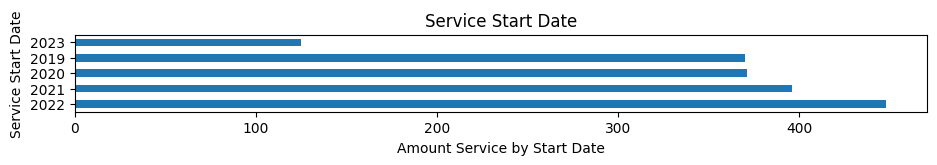

In [24]:
fig = df_base["SERVICE_START_DATE"].dt.year.value_counts().plot.barh(figsize=(11,1))
fig.set_title('Service Start Date')
fig.set_ylabel('Service Start Date')
fig.set_xlabel('Amount Service by Start Date')

freq(df_base["SERVICE_START_DATE"].dt.year)

,Amount,Percent (%)
2022,441,26.486486
2021,404,24.264264
2020,346,20.780781
2023,237,14.234234
2019,205,12.312312
2024,32,1.921922


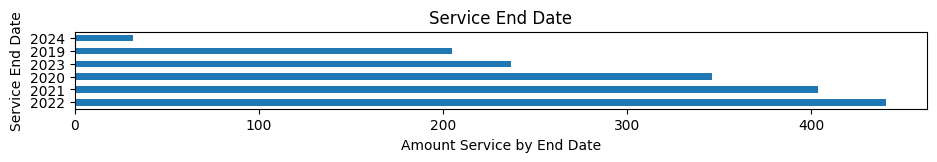

In [25]:
fig = df_base["SERVICE_END_DATE"].dropna().dt.year.value_counts().plot.barh(figsize=(11,1))
fig.set_title('Service End Date')
fig.set_ylabel('Service End Date')
fig.set_xlabel('Amount Service by End Date')

freq(df_base["SERVICE_END_DATE"].dropna().dt.year)

,Amount,Percent (%)
11,179,10.467836
3,178,10.409357
2,159,9.298246
9,148,8.654971
10,147,8.596491
7,141,8.245614
1,136,7.953216
6,130,7.602339
4,127,7.426901
5,124,7.251462


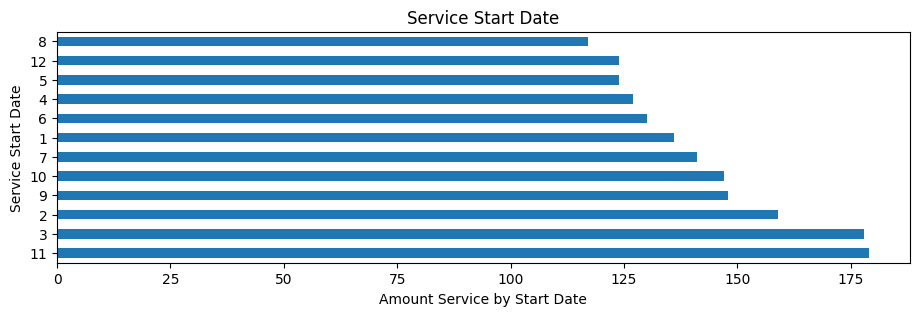

In [26]:
fig = df_base["SERVICE_START_DATE"].dt.month.value_counts().plot.barh(figsize=(11,3))
fig.set_title('Service Start Date')
fig.set_ylabel('Service Start Date')
fig.set_xlabel('Amount Service by Start Date')

freq(df_base["SERVICE_START_DATE"].dt.month)

,Amount,Percent (%)
3,178,10.690691
8,161,9.669670
2,152,9.129129
1,148,8.888889
11,146,8.768769
9,140,8.408408
6,138,8.288288
10,131,7.867868
7,124,7.447447
12,122,7.327327


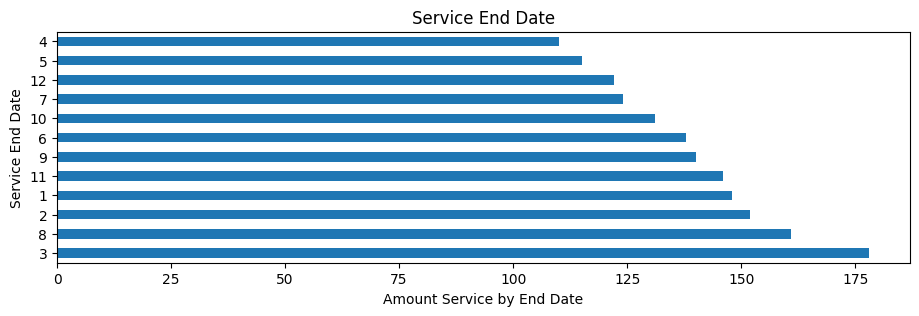

In [27]:
fig = df_base["SERVICE_END_DATE"].dropna().dt.month.value_counts().plot.barh(figsize=(11,3))
fig.set_title('Service End Date')
fig.set_ylabel('Service End Date')
fig.set_xlabel('Amount Service by End Date')

freq(df_base["SERVICE_END_DATE"].dropna().dt.month)

In [28]:
df_base.groupby(['SERVICE_START_DATE'])['SERVICE_WID'].count().describe()

count   858.00
mean      1.99
std       1.19
min       1.00
25%       1.00
50%       2.00
75%       3.00
max       7.00
Name: SERVICE_WID, dtype: float64

In [29]:
df_base.dropna(subset=['SERVICE_END_DATE']).groupby(['SERVICE_END_DATE'])['SERVICE_WID'].count().describe()

count   945.00
mean      1.76
std       1.06
min       1.00
25%       1.00
50%       1.00
75%       2.00
max       9.00
Name: SERVICE_WID, dtype: float64

In [30]:
s = df_base['SERVICE_START_DATE'].dt.strftime('%Y-%m')
s.groupby(lambda x: s[x]).count().describe()

count   50.00
mean    34.20
std     10.93
min      1.00
25%     28.25
50%     33.50
75%     40.75
max     58.00
Name: SERVICE_START_DATE, dtype: float64

In [31]:
s = df_base['SERVICE_END_DATE'].dropna().dt.strftime('%Y-%m')
s.groupby(lambda x: s[x]).count().describe()

count   65.00
mean    25.62
std     13.06
min      1.00
25%     13.00
50%     27.00
75%     35.00
max     54.00
Name: SERVICE_END_DATE, dtype: float64

,Amount,Percent (%)
2019-11,58,3.391813
2022-11,57,3.333333
2019-07,53,3.099415
2020-02,51,2.982456
2019-10,47,2.748538
2020-03,47,2.748538
2019-12,45,2.631579
2021-03,45,2.631579
2022-03,45,2.631579
2020-01,43,2.514620


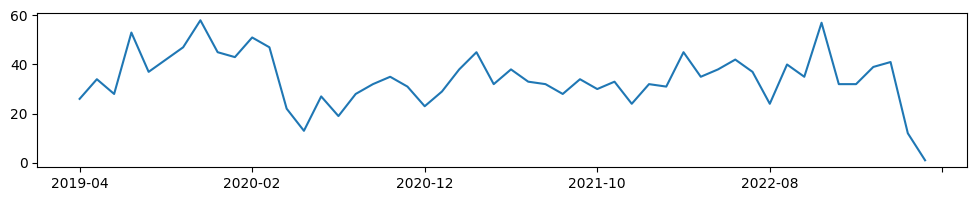

In [32]:
s = df_base['SERVICE_START_DATE'].dt.strftime('%Y-%m')
s.groupby(lambda x: s[x]).count().plot.line(figsize=(12,2))
fig.set_title('Service Start Date')
fig.set_ylabel('Service Start Date')
fig.set_xlabel('Amount Service by Start Date')

freq(df_base['SERVICE_START_DATE'].dt.strftime('%Y-%m'))

,Amount,Percent (%)
2022-06,54,3.243243
2021-03,48,2.882883
2022-09,46,2.762763
2023-03,46,2.762763
2020-08,42,2.522523
2022-02,41,2.462462
2020-03,40,2.402402
2021-06,39,2.342342
2020-01,38,2.282282
2021-05,38,2.282282


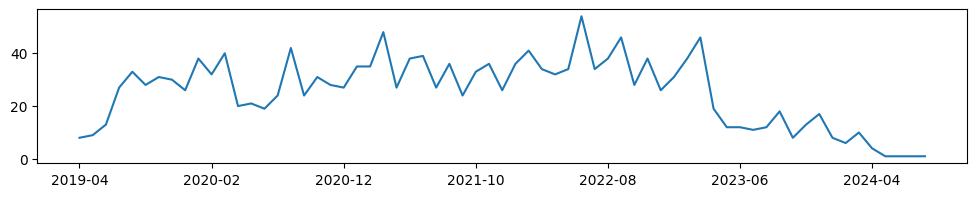

In [33]:
s = df_base['SERVICE_END_DATE'].dropna().dt.strftime('%Y-%m')
s.groupby(lambda x: s[x]).count().plot.line(figsize=(12,2))
fig.set_title('Service End Date')
fig.set_ylabel('Service End Date')
fig.set_xlabel('Amount Service by End Date')

freq(df_base['SERVICE_END_DATE'].dt.strftime('%Y-%m'))

`SERVICE_START_DATE`:
- Ranges from 2019-04-08 to 2023-05-24.
- The most prominent year is 2022, followed by 2019 and 2020. Worth noting is that, although the dataset lacks values from 2019-01 to 2019-03, there is a nearly equal number of entries for 2019 and 2020.
- Most prominent months: November and March.
- Mean of about 2 services recorded to start, with a maximum of 7 services in one day.
- Mean of 34 services recorded to start per month, with a maximum of 58 in November 2019, followed by 57 in November 2022.

`SERVICE_END_DATE`:
- Ranges from 2019-04-09 to 2024-11-29. Some end dates could be projections.
- The most prominent year is 2022; services show a generally increasing trend, except for 2024.
- Most prominent month: March.
- There are null values.
- Mean of end services is 1.76, with a maximum of 9 recorded in one day.
- Mean of 25 services per month for end services, with a maximum of 54 in June 2022.

**There are more services starting than finishing, suggesting a cumulative trend**

### Cost and Fees

Exploring columns based on values of cost and feed

In [34]:
df_base['TOTAL_COST_AMT'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1710 entries, 0 to 1712
Series name: TOTAL_COST_AMT
Non-Null Count  Dtype  
--------------  -----  
1185 non-null   float64
dtypes: float64(1)
memory usage: 91.3 KB


,count,mean,std,min,25%,50%,75%,max
TOTAL_COST_AMT,1185.00,3668.12,4762.90,0.00,813.75,2100.00,4200.00,38617.25
OUTCOME_FEES_PAID_AMT,444.00,612.80,1015.67,0.00,0.00,0.00,809.38,4812.50
SERVICE_SUPPORT_COST_AMT,444.00,1059.98,2696.09,0.00,0.00,69.12,391.05,18657.78


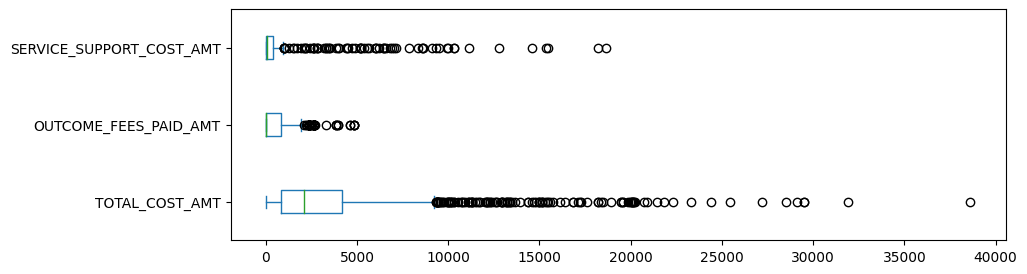

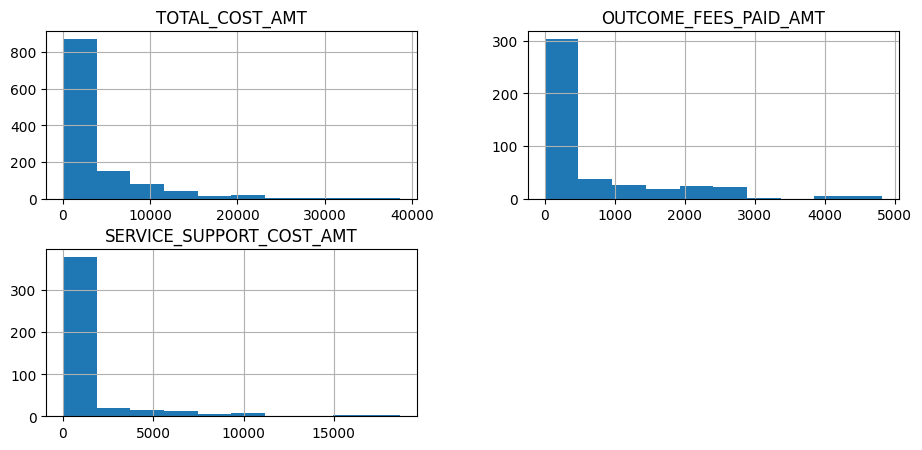

In [35]:
df_base[['TOTAL_COST_AMT','OUTCOME_FEES_PAID_AMT','SERVICE_SUPPORT_COST_AMT']].plot.box(vert=False, figsize=(10,3))
df_base[['TOTAL_COST_AMT','OUTCOME_FEES_PAID_AMT','SERVICE_SUPPORT_COST_AMT']].hist(figsize=(11,5))
df_base[['TOTAL_COST_AMT','OUTCOME_FEES_PAID_AMT','SERVICE_SUPPORT_COST_AMT']].describe().T

`TOTAL_COST_AMT`:
- Ranges from 0 to 38,617.25
- Mean of total cost is 3,668.12
- Most services have cost

`OUTCOME_FEES_PAID_AMT`:
- Ranges from 0 to 809.38
- Mean of outcome fees paid is 612.80
- Most services performed do not have outcome fees

`SERVICE_SUPPORT_COST_AMT`:
- Ranges from 0 to 391.05.
- Mean of service support cost is 1,059.98
- Most services performed do not have support cost

## By Client

### Client Gender

,Amount,Percent (%)
Man/Boy,839,49.064327
Woman/Girl,831,48.596491
Non-Binary,22,1.286550
Unspecified,15,0.877193
M,3,0.175439


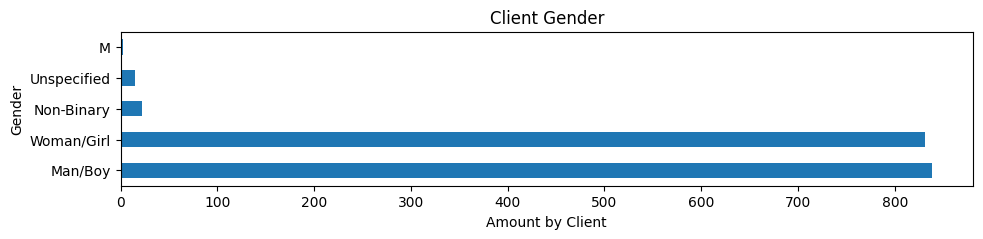

In [36]:
fig = df_base['GENDER'].value_counts().plot.barh(figsize=(11,2))
fig.set_title('Client Gender')
fig.set_ylabel('Gender')
fig.set_xlabel('Amount by Client')

freq(df_base,"GENDER")

- Probably 'M' and 'Man/Boy' in the gender column likely represent the same category.
- To streamline our data and avoid redundancy, I'm converting all instances of 'M' to 'Man/Boy.' This will help in maintaining consistency.

In [37]:
idx = df_base.query("GENDER=='M'").index
df_base['GENDER'].loc[idx] = 'Man/Boy'

/tmp/ipykernel_2929042/604615435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['GENDER'].loc[idx] = 'Man/Boy'


,Amount,Percent (%)
Man/Boy,842,49.239766
Woman/Girl,831,48.596491
Non-Binary,22,1.286550
Unspecified,15,0.877193


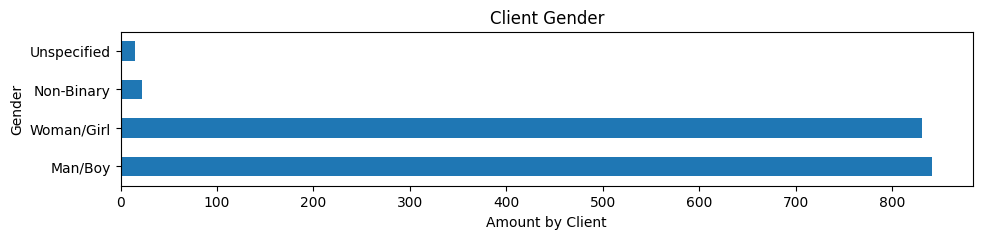

In [38]:
fig = df_base['GENDER'].value_counts().plot.barh(figsize=(11,2))
fig.set_title('Client Gender')
fig.set_ylabel('Gender')
fig.set_xlabel('Amount by Client')

freq(df_base,"GENDER")

- The client distribution shows a slight majority of males at 49%, with females slightly behind (48%). Non-binary and unspecified genders together make up about 2%

### Client Education Level

,Amount,Percent (%)
University,296,17.309942
Secondary,295,17.251462
Appreticeshiip,288,16.842105
College,282,16.491228
Unknown,279,16.315789
Elementary,270,15.789474


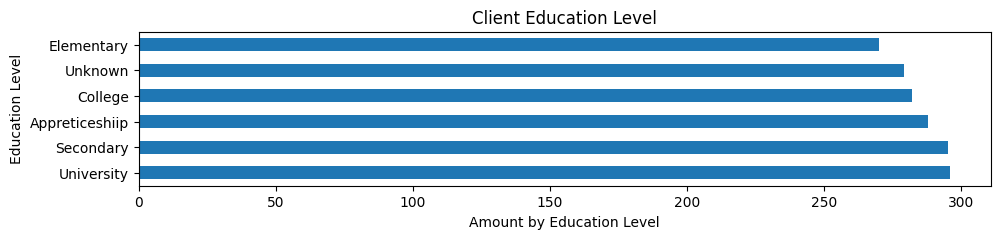

In [39]:
fig = df_base['EDUCATION_LEVEL'].value_counts().plot.barh(figsize=(11,2))
fig.set_title('Client Education Level')
fig.set_ylabel('Education Level')
fig.set_xlabel('Amount by Education Level')

freq(df_base,"EDUCATION_LEVEL")

- While the University category with a 17% share is the most prominent client education level, it's worth noting that the distribution among all categories appears to be fairly balanced.

### Client Birth Date

- Adding new features: BIRTH_DECATE, AGE, and GROUP_AGE

In [40]:
df_base['BIRTH_DECATE'] = df_base['BIRTH_DATE'].apply(lambda birth: birth.year - (birth.year%10))
df_base['AGE'] = df_base['BIRTH_DATE'].apply(lambda birth: date.today().year - birth.year - ((date.today().month, date.today().day) < (birth.month, birth.day)))

def f(val):    
    if val > 60: res = "60+"
    elif val >= 50: res = "50 - 59"
    elif val >= 40: res = "40 - 49"
    elif val >= 30: res = "30 - 39"
    elif val >= 20: res = "20 - 29"
    else: res = "19-"
    return res.strip()

df_base['GROUP_AGE'] = df_base["AGE"].apply(f)

In [41]:
df_base["BIRTH_DECATE"].describe()

count   1710.00
mean    1988.26
std       12.00
min     1950.00
25%     1980.00
50%     1990.00
75%     2000.00
max     2000.00
Name: BIRTH_DECATE, dtype: float64

In [42]:
df_base["BIRTH_DATE"].dt.year.describe()

count   1710.00
mean    1992.63
std       11.60
min     1955.00
25%     1986.00
50%     1996.00
75%     2002.00
max     2006.00
Name: BIRTH_DATE, dtype: float64

In [43]:
df_base["AGE"].describe()

count   1710.00
mean      30.46
std       11.60
min       17.00
25%       21.00
50%       27.00
75%       37.00
max       68.00
Name: AGE, dtype: float64

<AxesSubplot:>

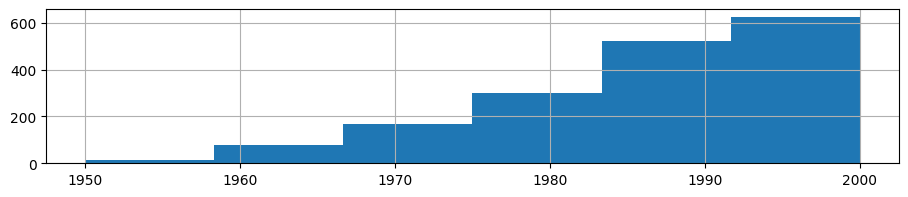

In [44]:
df_base["BIRTH_DECATE"].hist(bins = df_base["BIRTH_DECATE"].nunique(), figsize=(11,2))

<AxesSubplot:>

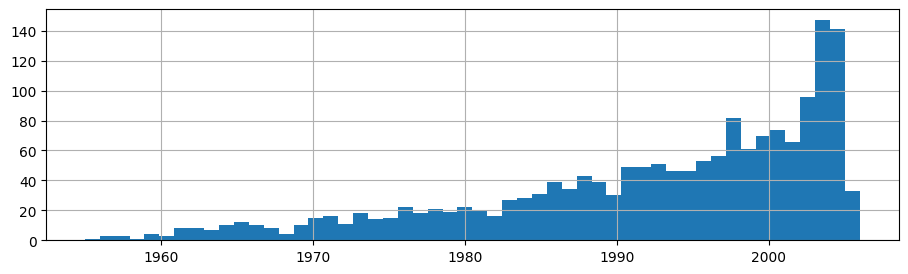

In [45]:
df_base["BIRTH_DATE"].dt.year.hist(bins = df_base["BIRTH_DATE"].dt.year.nunique(), figsize=(11,3))

<AxesSubplot:>

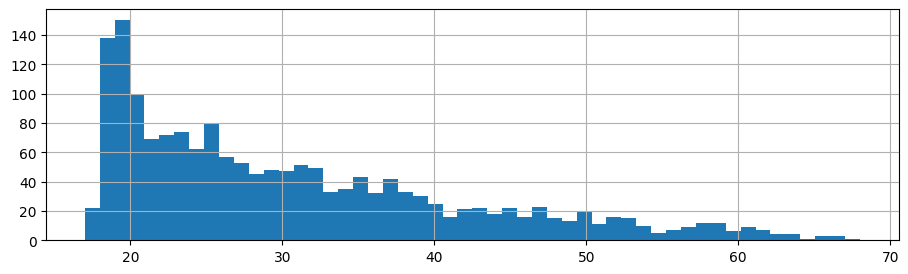

In [46]:
df_base["AGE"].hist(bins = df_base["AGE"].nunique(), figsize=(11,3))

<AxesSubplot:>

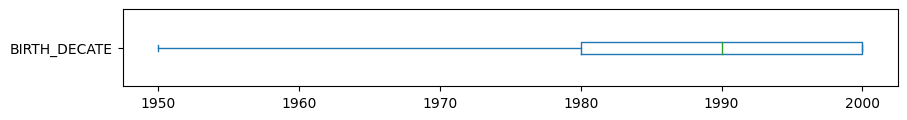

In [47]:
df_base['BIRTH_DECATE'].plot.box(vert=False, figsize=(10,1))


<AxesSubplot:>

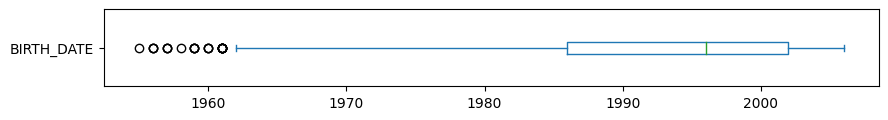

In [48]:
df_base['BIRTH_DATE'].dt.year.plot.box(vert=False, figsize=(10,1))


<AxesSubplot:>

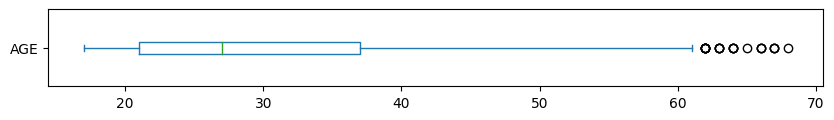

In [49]:
df_base['AGE'].plot.box(vert=False, figsize=(10,1))


,Amount,Percent (%)
2000,627,36.666667
1990,523,30.584795
1980,299,17.485380
1970,169,9.883041
1960,80,4.678363
1950,12,0.701754


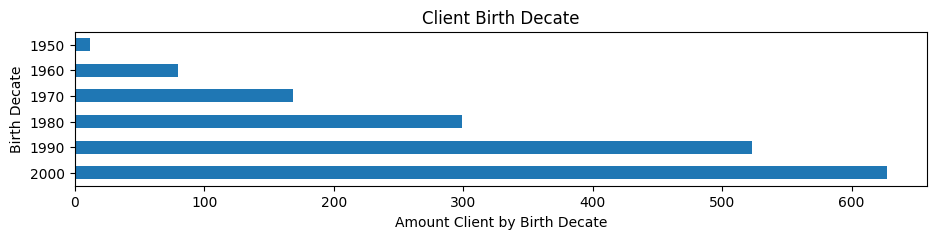

In [50]:
fig = df_base["BIRTH_DECATE"].value_counts().plot.barh(figsize=(11,2))
fig.set_title('Client Birth Decate')
fig.set_ylabel('Birth Decate')
fig.set_xlabel('Amount Client by Birth Decate')

freq(df_base["BIRTH_DECATE"])

,Amount,Percent (%)
20 - 29,659,38.538012
30 - 39,395,23.099415
19-,310,18.128655
40 - 49,191,11.169591
50 - 59,123,7.192982
60+,32,1.871345


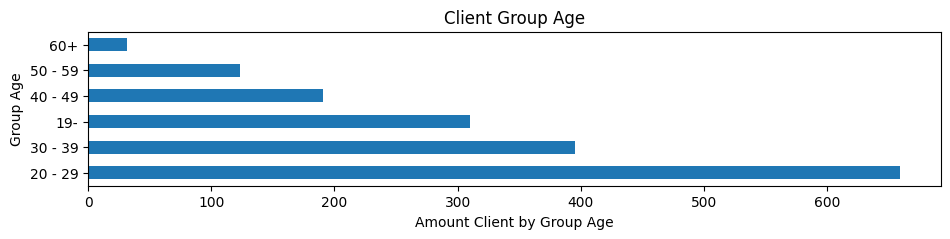

In [51]:
fig = df_base['GROUP_AGE'].value_counts().plot.barh(figsize=(11,2))
fig.set_title('Client Group Age')
fig.set_ylabel('Group Age')
fig.set_xlabel('Amount Client by Group Age')

freq(df_base,"GROUP_AGE")

,Amount,Percent (%)
2004,147,8.596491
2005,141,8.245614
2003,96,5.614035
1998,82,4.795322
2001,74,4.327485
2000,70,4.093567
2002,66,3.859649
1999,61,3.567251
1997,56,3.274854
1996,53,3.099415


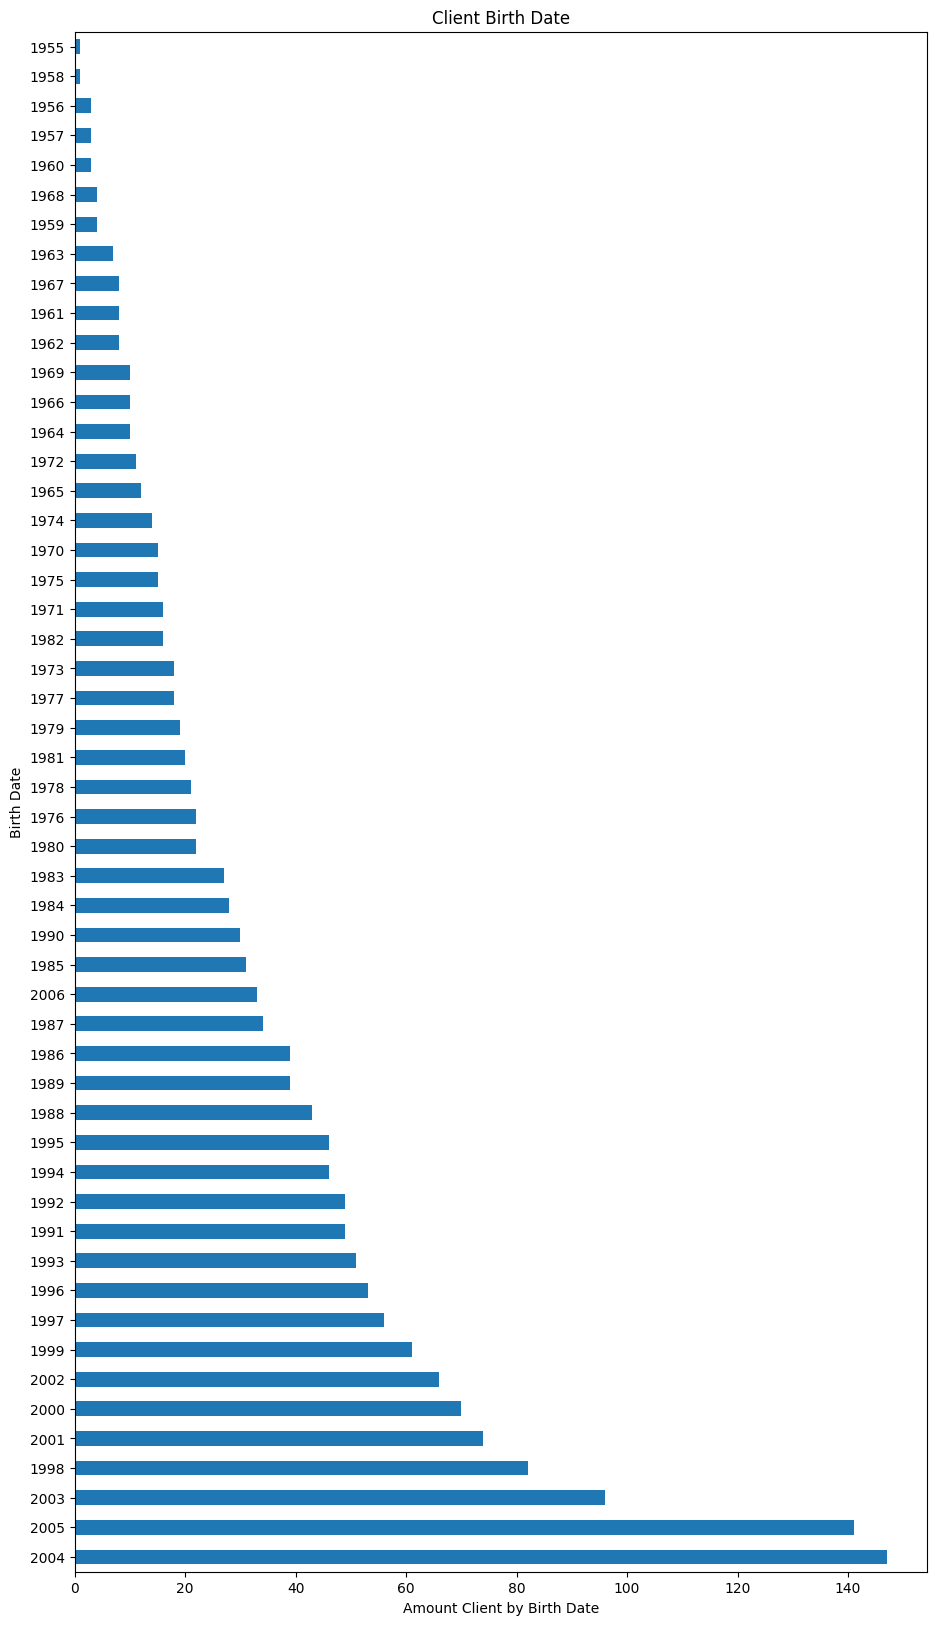

In [52]:
fig = df_base["BIRTH_DATE"].dt.year.value_counts().plot.barh(figsize=(11,20))
fig.set_title('Client Birth Date')
fig.set_ylabel('Birth Date')
fig.set_xlabel('Amount Client by Birth Date')

freq(df_base["BIRTH_DATE"].dt.year)

,Amount,Percent (%)
19,150,8.771930
18,138,8.070175
20,99,5.789474
25,80,4.678363
23,74,4.327485
22,72,4.210526
21,69,4.035088
24,62,3.625731
26,57,3.333333
27,53,3.099415


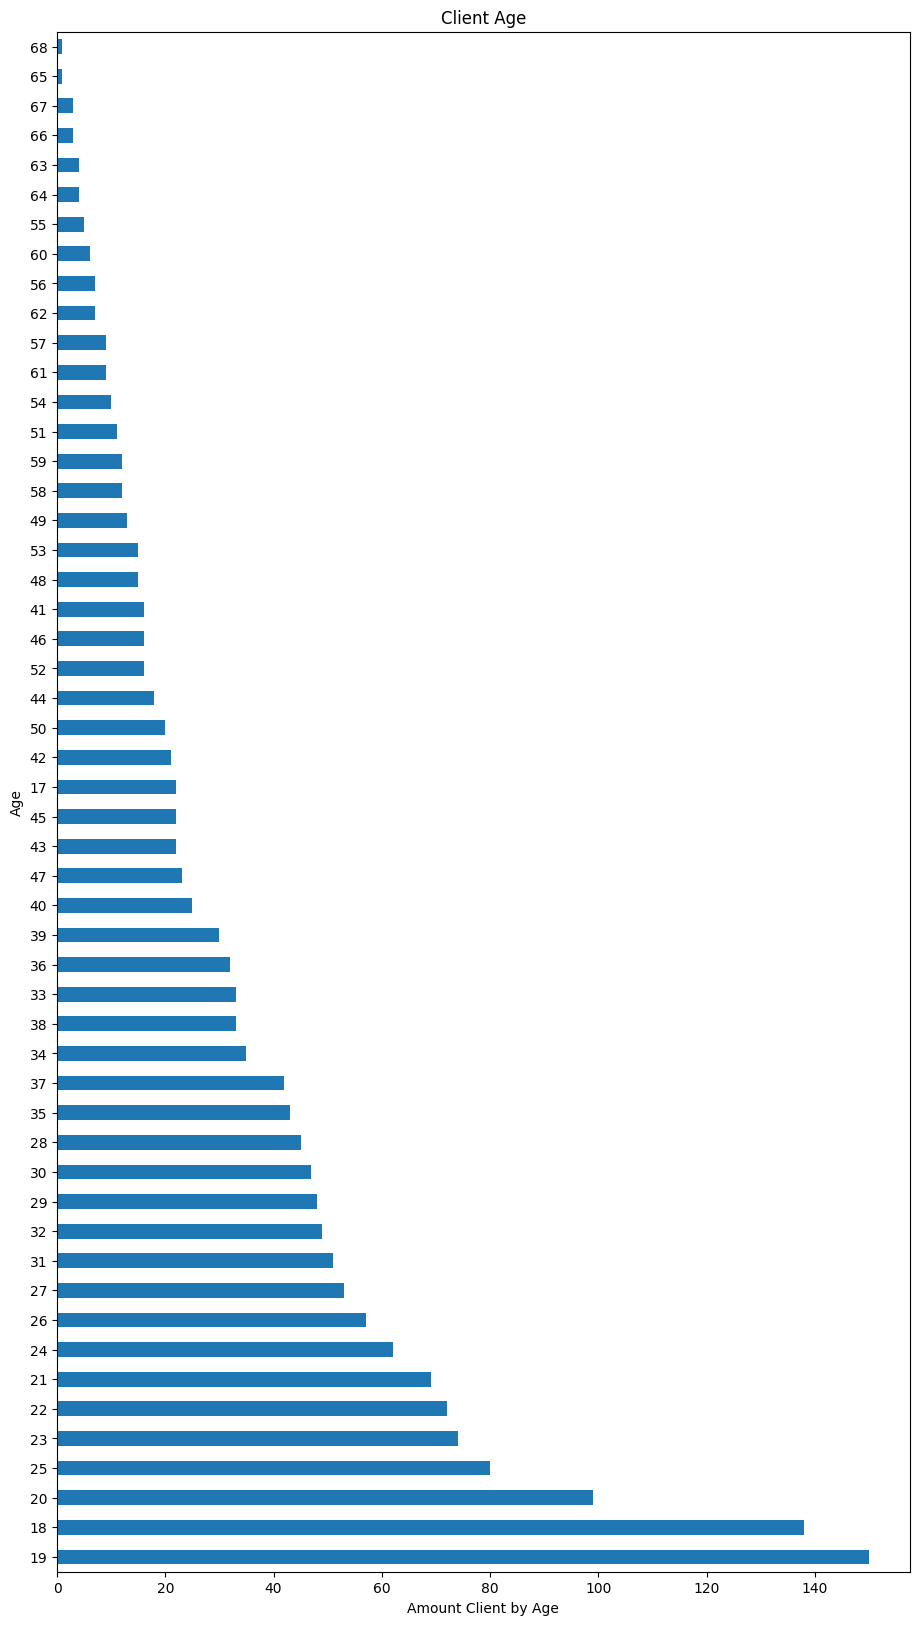

In [53]:
fig = df_base["AGE"].value_counts().plot.barh(figsize=(11,20))
fig.set_title('Client Age')
fig.set_ylabel('Age')
fig.set_xlabel('Amount Client by Age')

freq(df_base["AGE"])

- Mean and Median birth years for clients are 1992 (30/31 years) and 1996 (27 years), respectively.
- The highest number of clients is from the combined group born in the 2000s and 90s.
- Clients born before 1961 are considered outliers.

### Client Type

,Amount,Percent (%)
EI Active,177,10.350877
EI Reachback,174,10.175439
General with a Disability,110,6.432749
BCEA NEO Other and EI Active,106,6.198830
BCEA EO and EI Active,105,6.140351
BCEA NEO PWD,103,6.023392
General w/o a Disability,101,5.906433
BCEA EO,98,5.730994
BCEA NEO PWD and EI Reachback,97,5.672515
BCEA EO and EI Reachback,96,5.614035


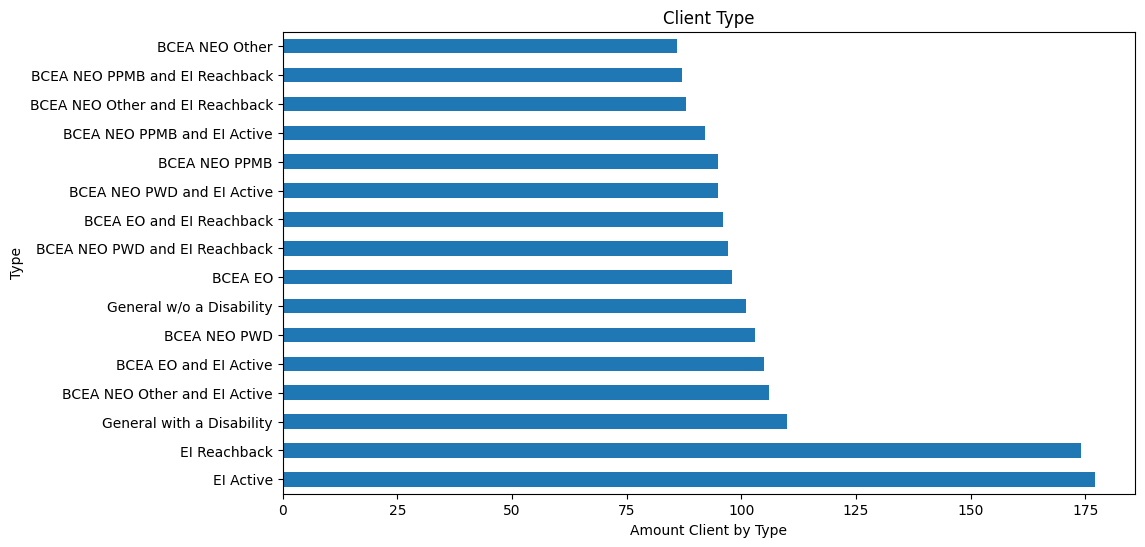

In [54]:
fig = df_base["CLIENT_TYPE"].value_counts().plot.barh(figsize=(11,6))
fig.set_title('Client Type')
fig.set_ylabel('Type')
fig.set_xlabel('Amount Client by Type')

freq(df_base["CLIENT_TYPE"])

- EI Active and EI Reachback categories have more clients.
- Despite this, it's worth noting that the distribution among all categories appears to be fairly balanced.

<hr>

# Exploring by questions based on previous analysis

### What are the sub service grouped by service?

In [55]:
df_base.groupby(['SERVICE','SUB_SERVICE'])[['SERVICE_WID']].count().style.background_gradient(axis=None, cmap="Greys")

- The most common service and sub-service is **Client Needs Assessment**

### What are the plan name values grouped by service and sub service?

In [56]:
cross_categories(df_base,"PLAN_NAME","SERVICE")

SERVICE,Assistive Technology,Client Needs Assessment,External Referrals,Job Search,Job Sustainment,Self-Employment,Self-Serve Services,Skills Enhancement - Competency Based Learning,Skills Enhancement - ESS Workshops,Skills Enhancement - STOC,Skills Enhancement - Training Services,Specialized Assessments,Work Experience
PLAN_NAME,,,,,,,,,,,,,
Self-Serve,0,0,0,0,0,0,184,0,0,0,0,0,0
Employment Sevices,1,424,40,306,196,20,4,6,328,79,40,34,48


- Plan names are **Self-Serve**	and **Employment Sevices**
- The most common plan is **Employment Sevices**

### What is the service status values grouped by service plan status?

In [57]:
freq(df_base,"SRV_PLAN_STATUS_CD")

,Amount,Percent (%)
Closed,1093,63.918129
Open,617,36.081871


- The most services are set as **Closed** in `SRV_PLAN_STATUS_CD`.

In [58]:
df_base.groupby(['SRV_PLAN_STATUS_CD','SERVICE_STATUS_CD'])[['SERVICE_WID']].count().style.background_gradient(axis=None, cmap="Greys")

- Perhaps service set as **Cancelled** and **Closed** status in `SERVICE_STATUS_CD` have been incorrectly set as **Open** in `SRV_PLAN_STATUS_CD`.

- Checking null values in `SERVICE_END_DATE`:

In [59]:
df_base.query("SRV_PLAN_STATUS_CD=='Closed'")['SERVICE_END_DATE'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1093 entries, 0 to 1712
Series name: SERVICE_END_DATE
Non-Null Count  Dtype         
--------------  -----         
1093 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.1 KB


In [60]:
df_base.query("SRV_PLAN_STATUS_CD=='Open'")['SERVICE_END_DATE'].info()

<class 'pandas.core.series.Series'>
Int64Index: 617 entries, 16 to 1711
Series name: SERVICE_END_DATE
Non-Null Count  Dtype         
--------------  -----         
572 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.6 KB


- We can see above that there is no null values in `SERVICE_END_DATE` in all services set as Closed in `SRV_PLAN_STATUS_CD`. Otherwise, Open status in `SRV_PLAN_STATUS_CD` has 45 null values.

- I am not sure whether end date (`SERVICE_END_DATE`) is a projection or not.

In [61]:
freq(df_base.loc[df_base['SERVICE_END_DATE'].isnull()]['SERVICE_STATUS_CD'])

,Amount,Percent (%)
Set Up,31,68.888889
In Progress,13,28.888889
Waiting To Start,1,2.222222


- Null values in `SERVICE_END_DATE` are set to
    - **Open** status in `SRV_PLAN_STATUS_CD`
    - **Set Up** or **In Progress** or **Waiting To Start** in `SERVICE_STATUS_CD`

- There is no null values in `SERVICE_END_DATE` to `SERVICE_STATUS_CD` set as:
    - **Cancelled**
    - **Closed**
    - **Ended Delivery**


### What is the longest open service?

In [62]:
df_base[['SERVICE_START_DATE','SERVICE_END_DATE','SRV_PLAN_STATUS_CD','SERVICE_STATUS_CD','SERVICE_WID','SERVICE','SUB_SERVICE']].query("SRV_PLAN_STATUS_CD=='Open'").sort_values(by=['SERVICE_START_DATE'],ascending=True).head(1)

,SERVICE_START_DATE,SERVICE_END_DATE,SRV_PLAN_STATUS_CD,SERVICE_STATUS_CD,SERVICE_WID,SERVICE,SUB_SERVICE
668,2019-04-30,2019-07-23,Open,Closed,2942754264.00,Work Experience,Wage Subsidy Work Experience


- The longest open service was recorded in "2019-04-30".

In [63]:
df_base[['SERVICE_START_DATE','SERVICE_END_DATE','SRV_PLAN_STATUS_CD','SERVICE_STATUS_CD','SERVICE_WID','SERVICE','SUB_SERVICE']].query("SRV_PLAN_STATUS_CD=='Open' and SERVICE_STATUS_CD in ['Set Up','In Progress','Waiting To Start']").sort_values(by=['SERVICE_START_DATE'],ascending=True).head(1)

,SERVICE_START_DATE,SERVICE_END_DATE,SRV_PLAN_STATUS_CD,SERVICE_STATUS_CD,SERVICE_WID,SERVICE,SUB_SERVICE
543,2019-05-22,NaT,Open,Set Up,2122385994.00,Self-Serve Services,Self-Serve Services


- Considering status different of Closed, Cancelled, and Ended Delivery in `SERVICE_STATUS_CD`, the longest open service was recorded in "2019-05-22".

### What is the mean of service's duration?

In [64]:
# Adding column to save service durantion in days
pos = df_base.columns.get_loc('SERVICE_END_DATE')
df_base.insert(pos+1,"SERVICE_DURATION",np.nan)
df_base['SERVICE_DURATION'] = (df_base['SERVICE_END_DATE'] - df_base['SERVICE_START_DATE']).dt.days

In [65]:
df_base.groupby(["SERVICE"])["SERVICE_DURATION"].agg(['mean','std','count','min','max']).sort_values(by="mean",ascending=False).style.background_gradient(axis=None, cmap="Greys")

,mean,std,count,min,max
SERVICE,,,,,
Job Sustainment,369.525510,148.445948,196,0.000000,1125.000000
Job Search,196.518152,190.626274,303,0.000000,1073.000000
Self-Serve Services,169.641975,209.873124,162,0.000000,869.000000
Work Experience,151.875000,222.847780,48,0.000000,1461.000000
Skills Enhancement - Training Services,143.282051,121.390832,39,0.000000,451.000000
Self-Employment,111.350000,106.622440,20,0.000000,265.000000
Skills Enhancement - ESS Workshops,110.190031,163.040020,321,0.000000,1151.000000
External Referrals,85.923077,84.829360,39,0.000000,356.000000
Client Needs Assessment,81.133971,139.790581,418,0.000000,975.000000


- On average, **Job Sustainment** is the longest service.
- But we have a **Work Experience** service with the greatest duration.

- **Client Needs Assessment** has the highest demand among the services, while **Assistive Technology** has the lowest.

In [66]:
df_base.groupby(["SERVICE","SUB_SERVICE"])["SERVICE_DURATION"].agg(['mean','std','count','min','max']).sort_values(by="mean",ascending=False).style.background_gradient(axis=None, cmap="Greys")

,,mean,std,count,min,max
SERVICE,SUB_SERVICE,,,,,
Job Sustainment,Job Sustainment,369.525510,148.445948,196,0.000000,1125.000000
Work Experience,Customized Employment - Employment Focused,330.500000,504.774348,8,29.000000,1461.000000
Self-Serve Services,Self-Serve Job Sustainment,317.357143,163.305715,28,0.000000,731.000000
Self-Employment,Business Launch & Implementation,226.428571,99.408010,7,1.000000,265.000000
Skills Enhancement - Training Services,Adult Basic Ed - Academic Upgrading,207.000000,177.620382,3,42.000000,395.000000
Skills Enhancement - Competency Based Learning,Basic Life Skills Training,206.500000,290.620887,2,1.000000,412.000000
Job Search,Job Search,196.518152,190.626274,303,0.000000,1073.000000
Work Experience,Job Creation Partnerships Work Experience,189.333333,67.009950,3,132.000000,263.000000
Skills Enhancement - ESS Workshops,Basic Life Skills Workshop,181.142857,159.246589,7,0.000000,367.000000


- Grouping by SUB_SERVICE as well, we can see:
    - On average, **Job Sustainment** is the longest sub service.
    - **Customized Employment - Employment Focused** is the sub service with the greatest duration
    - Likewise service, **Client Needs Assessment** has the highest demand among the sub services, while the lowest ones are:
        - **Short Duration Training - FeePayer**
        - **Assistive Technology Assessment**
        - **Audiological Assessment**
        - **Learning Disability Assessment**
        - **Other Specialized Assessment Types**
        - **Needs Determination Services**


In [67]:
freq(df_base['SERVICE'].loc[df_base['SERVICE_END_DATE'].isnull()])

,Amount,Percent (%)
Self-Serve Services,26,57.777778
Skills Enhancement - ESS Workshops,7,15.555556
Client Needs Assessment,6,13.333333
Job Search,3,6.666667
Specialized Assessments,1,2.222222
External Referrals,1,2.222222
Skills Enhancement - Training Services,1,2.222222


In [68]:
freq(df_base['SUB_SERVICE'].loc[df_base['SERVICE_END_DATE'].isnull()])

,Amount,Percent (%)
Self-Serve Services,26,57.777778
Find Jobs or Work Experience Workshop,6,13.333333
Client Needs Assessment,6,13.333333
Job Search,3,6.666667
Prepare for Employment Workshop,1,2.222222
Psychological Vocational Assessment,1,2.222222
Referral to Other Community Agencies,1,2.222222
Occupational Skills Training - Feepayer,1,2.222222


- When filtering by services and sub-services with null values in `SERVICE_END_DATE`, it becomes apparent that **Self-Serve Services** is the most common.

In [69]:
df_base.query("SRV_PLAN_STATUS_CD == 'Open'").groupby(['SERVICE_STATUS_CD',"SERVICE"])["SERVICE_DURATION"].agg(['mean','std','count','min','max']).reset_index().sort_values(by=['SERVICE_STATUS_CD',"mean"],ascending=False).style.background_gradient(axis=None, cmap="Greys")

,SERVICE_STATUS_CD,SERVICE,mean,std,count,min,max
47,Waiting To Start,Skills Enhancement - Training Services,98.000000,nan,1,98.000000,98.000000
46,Waiting To Start,Skills Enhancement - ESS Workshops,4.000000,2.828427,2,2.000000,6.000000
42,Set Up,Self-Serve Services,365.500000,0.707107,2,365.000000,366.000000
39,Set Up,Client Needs Assessment,365.000000,nan,1,365.000000,365.000000
41,Set Up,Job Sustainment,364.000000,nan,1,364.000000,364.000000
43,Set Up,Skills Enhancement - ESS Workshops,184.000000,nan,1,184.000000,184.000000
45,Set Up,Work Experience,167.000000,nan,1,167.000000,167.000000
40,Set Up,Job Search,nan,nan,0,nan,nan
44,Set Up,Skills Enhancement - Training Services,nan,nan,0,nan,nan
38,In Progress,Work Experience,1072.000000,550.129076,2,683.000000,1461.000000


- Grouping by `SERVICE` and `SERVICE_STATUS_CD` with `SRV_PLAN_STATUS_CD` set as **Open**, we can see:
    - The service that has been ongoing the longest is still **In Progress**, spanning over 1461 days.
    - Most services are **In Progress** or **Closed** in `SERVICE_STATUS_CD`.
    - **Job Sustainment** and **Job Search** have the highest demand among the services **In Progress** in `SERVICE_STATUS_CD`.
    - **Client Needs Assessment**, **Skills Enhancement - ESS Workshops** and **Job Search** have the highest demand among the services **Closed** in `SERVICE_STATUS_CD`.
    

In [70]:
df_base.query("SRV_PLAN_STATUS_CD == 'Closed'").groupby(['SERVICE_STATUS_CD',"SERVICE"])["SERVICE_DURATION"].agg(['mean','std','count','min','max']).reset_index().sort_values(by=['SERVICE_STATUS_CD',"mean"],ascending=False).style.background_gradient(axis=None, cmap="Greys")

,SERVICE_STATUS_CD,SERVICE,mean,std,count,min,max
24,Ended Delivery,Self-Serve Services,38.000000,nan,1,38.000000,38.000000
15,Closed,Job Sustainment,372.533835,143.822731,133,0.000000,935.000000
17,Closed,Self-Serve Services,188.446154,188.870494,65,0.000000,673.000000
14,Closed,Job Search,186.379679,184.899537,187,0.000000,876.000000
21,Closed,Skills Enhancement - Training Services,151.700000,84.102757,20,1.000000,270.000000
23,Closed,Work Experience,123.142857,80.715107,21,11.000000,340.000000
16,Closed,Self-Employment,102.285714,109.498457,14,0.000000,265.000000
19,Closed,Skills Enhancement - ESS Workshops,98.478261,133.348549,184,0.000000,784.000000
12,Closed,Client Needs Assessment,81.592593,139.203619,270,0.000000,975.000000
13,Closed,External Referrals,80.666667,69.562839,30,0.000000,261.000000


- Grouping by `SERVICE` and `SERVICE_STATUS_CD` with `SRV_PLAN_STATUS_CD` set as **Closed**, we can see:
    - On average, **Job Sustainment** is the longest service and is most common among the statuses from `SERVICE_STATUS_CD`. Its average duration ranges from 322 days in services marked as **Cancelled** to 372 days in services marked as **Closed**.
    - Among the services marked as **Closed** in `SERVICE_STATUS_CD`, **Client Needs Assessment** has the highest demand and an average duration of 81 days.
    - **Self-Serve Services** is the most common service marked as **Cancelled**

### Is there correlation between costs, fees, and duration?

In [71]:
df_base[["TOTAL_COST_AMT","OUTCOME_FEES_PAID_AMT","SERVICE_SUPPORT_COST_AMT","SERVICE_DURATION"]].corr().style.background_gradient(axis=None, vmin=-1, vmax=1, cmap="RdBu")

,TOTAL_COST_AMT,OUTCOME_FEES_PAID_AMT,SERVICE_SUPPORT_COST_AMT,SERVICE_DURATION
TOTAL_COST_AMT,1.000000,0.021904,0.501932,0.083075
OUTCOME_FEES_PAID_AMT,0.021904,1.000000,-0.221848,0.508545
SERVICE_SUPPORT_COST_AMT,0.501932,-0.221848,1.000000,-0.120749
SERVICE_DURATION,0.083075,0.508545,-0.120749,1.000000


- There is a positive moderate correlation between: 
    - the total cost amount (`TOTAL_COST_AMT`) and the service support cost amount (`SERVICE_SUPPORT_COST_AMT`);
    - the outcome fees paid (`OUTCOME_FEES_PAID_AMT`) and the service duration (`SERVICE_DURATION`)

### What is the sum and mean of costs and fees grouped by year?

- As I am uncertain whether the cost is assigned to the `SERVICE_START_DATE` or the `SERVICE_END_DATE`, I am checking both the start and end dates.

In [72]:
df_base.groupby(['SERVICE_START_YEAR'])[['TOTAL_COST_AMT','OUTCOME_FEES_PAID_AMT','SERVICE_SUPPORT_COST_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")

In [73]:
df_base.dropna(subset=['SERVICE_END_YEAR']).astype({"SERVICE_END_YEAR": 'int'}).groupby(['SERVICE_END_YEAR'])[['TOTAL_COST_AMT','OUTCOME_FEES_PAID_AMT','SERVICE_SUPPORT_COST_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")

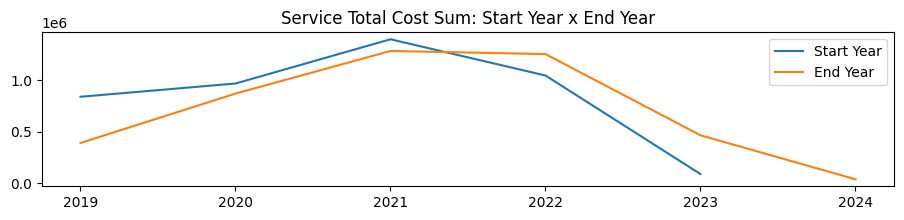

In [74]:
plt.figure(figsize=(11,2))
plt.plot(df_base.groupby(['SERVICE_START_YEAR'])[['TOTAL_COST_AMT']].sum(),label='Start Year')
plt.plot(df_base.groupby(['SERVICE_END_YEAR'])[['TOTAL_COST_AMT']].sum(),label='End Year')
plt.title('Service Total Cost Sum: Start Year x End Year')
plt.legend()

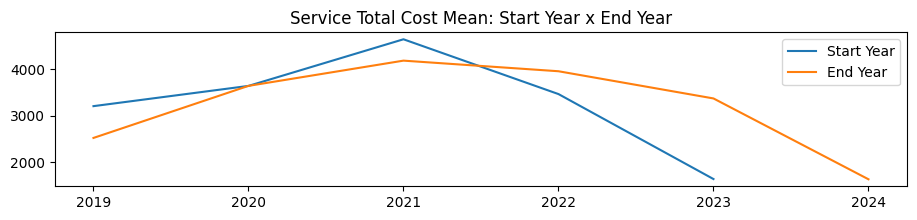

In [75]:
plt.figure(figsize=(11,2),)
plt.plot(df_base.groupby(['SERVICE_START_YEAR'])[['TOTAL_COST_AMT']].mean(),label='Start Year')
plt.plot(df_base.groupby(['SERVICE_END_YEAR'])[['TOTAL_COST_AMT']].mean(),label='End Year')
plt.title('Service Total Cost Mean: Start Year x End Year')
plt.legend()

In [76]:
df_base.groupby(['SERVICE_START_YEAR','SERVICE_START_MONTH'])[['TOTAL_COST_AMT','OUTCOME_FEES_PAID_AMT','SERVICE_SUPPORT_COST_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")

In [77]:
df_base.dropna(subset=['SERVICE_END_YEAR']).astype({"SERVICE_END_YEAR": 'int',"SERVICE_END_MONTH":'int'}).groupby(['SERVICE_END_YEAR','SERVICE_END_MONTH'])[['TOTAL_COST_AMT','OUTCOME_FEES_PAID_AMT','SERVICE_SUPPORT_COST_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")

- Total cost for 2021 has the highest sum and mean values for both
    - `SERVICE_START_YEAR`
        - sum: 1,400,298.02
        - mean: 4,652.15
    - `SERVICE_END_YEAR`
        - sum: 1,286,639.87
        - mean: 4,191.00

### What is the trend of `TOTAL_COST_AMT` to 2023 and 2024?

- Given the absence of values for 2019 in the dataset, I applied linear regression using data from 2020 to 2022 to predict the total cost for 2023 and 2024.

In [78]:
def pred(x_train,y_train,x_pred):
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    return reg.predict(x_pred)
    # print("Coefficients: \n", reg.coef_)

In [79]:
df_start_train = df_base.query("SERVICE_START_YEAR>2019 and SERVICE_START_YEAR<2023").groupby(['SERVICE_START_YEAR'],as_index=False)[['TOTAL_COST_AMT']].sum()
df_start_train

,SERVICE_START_YEAR,TOTAL_COST_AMT
0,2020,969686.69
1,2021,1400298.02
2,2022,1047748.40


In [80]:
df_end_train = df_base.dropna(subset=['SERVICE_END_YEAR']).astype({'SERVICE_END_YEAR':int}).query("SERVICE_END_YEAR>2019 and SERVICE_END_YEAR<2023").groupby(['SERVICE_END_YEAR'],as_index=False)[['TOTAL_COST_AMT']].sum()
df_end_train

,SERVICE_END_YEAR,TOTAL_COST_AMT
0,2020,871474.43
1,2021,1286639.87
2,2022,1255965.52


- Prediction considering `SERVICE_START_YEAR`, 

In [81]:
df_start_pred=pd.DataFrame()
df_start_pred['SERVICE_START_YEAR']=[2023,2024]
df_start_pred['TOTAL_COST_AMT']=pred(df_start_train[['SERVICE_START_YEAR']], df_start_train['TOTAL_COST_AMT'], df_start_pred[['SERVICE_START_YEAR']])
df_start_pred

,SERVICE_START_YEAR,TOTAL_COST_AMT
0,2023,1217306.08
1,2024,1256336.94


- Prediction considering `SERVICE_END_YEAR`

In [82]:
df_end_pred=pd.DataFrame()
df_end_pred['SERVICE_END_YEAR']=[2023,2024]
df_end_pred['TOTAL_COST_AMT']=pred(df_end_train[['SERVICE_END_YEAR']], df_end_train['TOTAL_COST_AMT'], df_end_pred[['SERVICE_END_YEAR']])
df_end_pred

,SERVICE_END_YEAR,TOTAL_COST_AMT
0,2023,1522517.70
1,2024,1714763.24


-  As part of the project decision, hereafter I am considering `SERVICE_START_YEAR` to analyze yearly costs and fees. I am uncertain about how `SERVICE_END_YEAR` is set, whether it represents a projection or not.

### What is the sum and mean of costs and fees grouped by service?

In [83]:
df_base.groupby(['SERVICE'])[['TOTAL_COST_AMT','OUTCOME_FEES_PAID_AMT','SERVICE_SUPPORT_COST_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")
# df_base.groupby(['SERVICE'])[['TOTAL_COST_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")
# df_base.groupby(['SERVICE'])[['OUTCOME_FEES_PAID_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")
# df_base.groupby(['SERVICE'])[['SERVICE_SUPPORT_COST_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")

In [84]:
df_base.groupby(['SERVICE', 'SUB_SERVICE'])[['TOTAL_COST_AMT','OUTCOME_FEES_PAID_AMT','SERVICE_SUPPORT_COST_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")
# df_base.groupby(['SERVICE', 'SUB_SERVICE'])[['TOTAL_COST_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")
# df_base.groupby(['SERVICE', 'SUB_SERVICE'])[['OUTCOME_FEES_PAID_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")
# df_base.groupby(['SERVICE', 'SUB_SERVICE'])[['SERVICE_SUPPORT_COST_AMT']].agg(['sum','mean','std','count','min','max']).style.background_gradient(axis=None, cmap="Greys")

- `TOTAL_COST_AMT`
    - Cumulative highest service and sub-service costs:
        - **Client Needs Assessment**: 821,253.98
        - **Job Search**: 791,372.00
    - On average, services with the highest costs are:
        - **Self-Employment**: 12,796.52, ranging from 1,750.00 to 19,600.00, with sub-services:
            - **Business Concept Development and Acceptance**: 16,061.61, ranging from 13,203.75 to 18,919.47
            - **Business Launch & Implementation**: 13,091.16, ranging from 1,750.00 to 19,600.00
            - **Business Plan Development**: 11,759.27, ranging from 3,463.60 to 19,572.00
        - **Work Experience**: 6,696.79, ranging from 0 to 25,455.55, with sub-services:
            - **Job Creation Partnerships Work Experience**: 16,471.69, ranging from 10,017.56 to 20,895.00
            - **Unpaid Work Experience**: 2,317.87, ranging from 1,529.50 to 3,106.25
            - **Wage Subsidy Work Experience**: 8,335.43, ranging from 87.50 to 25,455.55
    - Total costs are available for all services. **Client Needs Assessment** and **Job Search** have the highest cumulative costs, likely because they are the most requested services.

- `OUTCOME_FEES_PAID_AMT`
    - Cumulative highest service and sub-service outcome fees paid:
        - **Job Sustainment**: 	267,312.50
        - **Self-Serve Services**: 4,768.75, with **Self-Serve Job Sustainment** as sub-service
    - On average, services with the highest outcome fees paid are:
        - **Job Sustainment**: 1,460.72, ranging from 0 to 4,812.50
        - **Self-Serve Services**: 6,696.79, ranging from 0 to 393.75, with **Self-Serve Job Sustainment** as sub-service
    - Outcome fees paid are only present in **Job Sustainment** and **Self-Serve Services**. Others are either 0 or null values.

- `SERVICE_SUPPORT_COST_AMT`
    - Cumulative highest service support cost:
        - **Skills Enhancement - Training Services**: 126,630.56, with sub-services:
            - **Occupational Skills Training**: 98,022.03
            - **Project Based Labour Market Training**: 22,170.24
            - **Short Duration Training**: 6,438.29
        - **Work Experience**: 121,165.03, with sub-services:
            - **Job Creation Partnerships Work Experience**: 30,497.87
            - **Unpaid Work Experience**: 16.10
            - **Wage Subsidy Work Experience**: 90,651.06
    - On average, services with the highest support cost are:
        - **Self-Employment**: 6,828.65, ranging from 813.75 to 14,584.50, with sub-services:
            - **Business Launch & Implementation**: 12,279.75, ranging from 9975.00 to 14584.50
            - **Business Plan Development**: 4,648.210000, ranging from 813.75 to 12776.05
        - **Skills Enhancement - Training Services**: 5,065.22, ranging from 0 to 18,657.78, with sub-services:
            - **Occupational Skills Training**: 8,168.50, ranging from 811.99 to 18,657.78
            - **Project Based Labour Market Training**: 2,217.02, ranging from 0 to 7,000.00
            - **Short Duration Training**: 3,219.14, ranging from 400.79 to 6,037.50
    - There are no records of service support costs for **Assistive Technology**, **External Referrals**, and **Skills Enhancement - Competency Based Learning**.
    - **Job Sustainment** has the most records, but its average support cost is among the lowest.

- I am deducing that `TOTAL_COST_AMT` and `SERVICE_SUPPORT_COST_AMT` represent government costs, while `OUTCOME_FEES_PAID_AMT` reflects client costs. Given that our clients are executives, it makes sense to set a goal to decrease `TOTAL_COST_AMT`, as `SERVICE_SUPPORT_COST_AMT` also tends to decrease, given their positive moderate correlation.

### What is the total costs (`TOTAL_COST_AMT`) grouped by year and service (`SERVICE_START_YEAR`, `SERVICE`)?

In [85]:
for y in sorted(df_base['SERVICE_START_YEAR'].unique()):
    display(df_base.query("SERVICE_START_YEAR==@y").groupby(['SERVICE_START_YEAR','SERVICE'])[['TOTAL_COST_AMT']].agg(['sum','mean','std','count','min','max']).sort_values(by=[('TOTAL_COST_AMT','sum')],ascending=False).style.background_gradient(axis=None, cmap="Greys"))

- In 2019 and 2020 **Client Needs Assessment** and **Job Search** were the services with the highest costs, and they were also among the most requested services.
- In 2021, **Job Sustainment** surpassed **Client Needs Assessment** to become the service with the highest cost, likely due to its doubled mean cost. **Job Search** remained one of the most requested services, but its mean cost decreased.
- In 2022, **Job Search** and **Skills Enhancement** had the highest costs, respectively. Notably, **Job Search** not only remained the most requested service but also increased both in the number of requests and mean cost compared to the previous years. **Client Needs Assessment** continued to be among the most requested services, although its mean cost decreased.
- In 2023, **Job Search** again had the highest cost, followed by **Job Sustainment**. It's essential to highlight that our dataset covers `SERVICE_START_DATE` from 2019-04-08 to 2023-05-24.

### What is the client type grouped by gender, education level, and age?

In [86]:
cross_categories(df_base,'CLIENT_TYPE','BIRTH_DECATE')
cross_categories(df_base,'CLIENT_TYPE','GROUP_AGE')
cross_categories(df_base,'CLIENT_TYPE','GENDER')
cross_categories(df_base,'CLIENT_TYPE','EDUCATION_LEVEL')

CLIENT_TYPE,BCEA EO,BCEA EO and EI Active,BCEA EO and EI Reachback,BCEA NEO Other,BCEA NEO Other and EI Active,BCEA NEO Other and EI Reachback,BCEA NEO PPMB,BCEA NEO PPMB and EI Active,BCEA NEO PPMB and EI Reachback,BCEA NEO PWD,BCEA NEO PWD and EI Active,BCEA NEO PWD and EI Reachback,EI Active,EI Reachback,General w/o a Disability,General with a Disability
BIRTH_DECATE,,,,,,,,,,,,,,,,
1950,0,0,0,1,1,3,0,0,1,0,1,1,1,2,0,1
1960,4,7,4,3,7,4,7,3,4,1,3,5,8,8,4,8
1970,10,9,10,10,8,4,13,7,4,10,13,15,18,14,14,10
1980,19,20,13,11,15,18,19,21,14,21,12,13,32,34,16,21
1990,24,29,36,20,40,22,29,27,33,32,30,28,54,58,32,29
2000,41,40,33,41,35,37,27,34,31,39,36,35,64,58,35,41


CLIENT_TYPE,BCEA EO,BCEA EO and EI Active,BCEA EO and EI Reachback,BCEA NEO Other,BCEA NEO Other and EI Active,BCEA NEO Other and EI Reachback,BCEA NEO PPMB,BCEA NEO PPMB and EI Active,BCEA NEO PPMB and EI Reachback,BCEA NEO PWD,BCEA NEO PWD and EI Active,BCEA NEO PWD and EI Reachback,EI Active,EI Reachback,General w/o a Disability,General with a Disability
GROUP_AGE,,,,,,,,,,,,,,,,
19-,17,24,13,19,19,18,16,17,15,23,14,13,35,34,15,18
20 - 29,37,31,43,35,45,32,29,37,39,36,43,39,72,63,35,43
30 - 39,25,31,22,15,23,20,25,23,20,26,18,22,33,40,29,23
40 - 49,11,6,10,10,8,10,14,11,7,11,14,16,20,19,11,13
50 - 59,7,11,7,6,8,4,10,2,3,7,5,3,13,15,10,12
60+,1,2,1,1,3,4,1,2,3,0,1,4,4,3,1,1


CLIENT_TYPE,BCEA EO,BCEA EO and EI Active,BCEA EO and EI Reachback,BCEA NEO Other,BCEA NEO Other and EI Active,BCEA NEO Other and EI Reachback,BCEA NEO PPMB,BCEA NEO PPMB and EI Active,BCEA NEO PPMB and EI Reachback,BCEA NEO PWD,BCEA NEO PWD and EI Active,BCEA NEO PWD and EI Reachback,EI Active,EI Reachback,General w/o a Disability,General with a Disability
GENDER,,,,,,,,,,,,,,,,
Man/Boy,42,52,54,44,50,41,52,48,33,59,50,39,88,76,52,62
Non-Binary,1,1,3,1,1,0,2,0,1,2,0,3,2,2,2,1
Unspecified,2,0,1,1,0,2,0,2,3,2,0,0,1,0,0,1
Woman/Girl,53,52,38,40,55,45,41,42,50,40,45,55,86,96,47,46


CLIENT_TYPE,BCEA EO,BCEA EO and EI Active,BCEA EO and EI Reachback,BCEA NEO Other,BCEA NEO Other and EI Active,BCEA NEO Other and EI Reachback,BCEA NEO PPMB,BCEA NEO PPMB and EI Active,BCEA NEO PPMB and EI Reachback,BCEA NEO PWD,BCEA NEO PWD and EI Active,BCEA NEO PWD and EI Reachback,EI Active,EI Reachback,General w/o a Disability,General with a Disability
EDUCATION_LEVEL,,,,,,,,,,,,,,,,
Appreticeshiip,21,18,13,9,8,20,17,20,13,16,18,11,31,26,23,24
College,16,17,11,17,27,12,13,16,15,19,19,10,34,30,12,14
Elementary,8,24,19,10,21,10,13,15,15,12,14,18,28,31,16,16
Secondary,15,20,15,21,14,17,17,19,16,23,11,20,34,22,14,17
University,14,17,20,15,21,16,18,12,11,11,21,18,28,38,19,17
Unknown,24,9,18,14,15,13,17,10,17,22,12,20,22,27,17,22


- The most prevalent `CLIENT_TYPE` across all categories of age, education level, and gender is consistently **EI Active** and **EI Reachback**.

### What is the client gender grouped by education level, and age?

In [87]:
cross_categories(df_base,'GENDER','GROUP_AGE')
cross_categories(df_base,'GENDER','BIRTH_DECATE')
cross_categories(df_base,'GENDER','EDUCATION_LEVEL')

GROUP_AGE,19-,20 - 29,30 - 39,40 - 49,50 - 59,60+
GENDER,,,,,,
Man/Boy,155,326,191,95,60,15
Non-Binary,2,9,7,2,2,0
Unspecified,4,5,4,2,0,0
Woman/Girl,149,319,193,92,61,17


BIRTH_DECATE,1950,1960,1970,1980,1990,2000
GENDER,,,,,,
Man/Boy,6,40,79,156,249,312
Non-Binary,0,1,2,6,7,6
Unspecified,0,0,1,2,6,6
Woman/Girl,6,39,87,135,261,303


EDUCATION_LEVEL,Appreticeshiip,College,Elementary,Secondary,University,Unknown
GENDER,,,,,,
Man/Boy,144,134,131,148,145,140
Non-Binary,2,6,5,3,3,3
Unspecified,3,3,1,4,2,2
Woman/Girl,139,139,133,140,146,134


- The distribution of client gender is proportional to the number of clients in the categories of age and education level.

### What is the most service ordered by client type?


In [88]:
cross_categories(df_base,"SERVICE","CLIENT_TYPE")
cross_categories(df_base,"SERVICE","GENDER")
cross_categories(df_base,"SERVICE","GROUP_AGE")
cross_categories(df_base,"SERVICE","BIRTH_DECATE")
cross_categories(df_base,"SERVICE","EDUCATION_LEVEL")

CLIENT_TYPE,BCEA EO,BCEA EO and EI Active,BCEA EO and EI Reachback,BCEA NEO Other,BCEA NEO Other and EI Active,BCEA NEO Other and EI Reachback,BCEA NEO PPMB,BCEA NEO PPMB and EI Active,BCEA NEO PPMB and EI Reachback,BCEA NEO PWD,BCEA NEO PWD and EI Active,BCEA NEO PWD and EI Reachback,EI Active,EI Reachback,General w/o a Disability,General with a Disability
SERVICE,,,,,,,,,,,,,,,,
Assistive Technology,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Client Needs Assessment,17,30,22,24,26,23,20,24,29,25,22,29,48,33,22,30
External Referrals,3,4,0,1,1,6,5,1,2,6,1,2,4,4,0,0
Job Search,23,17,20,9,26,11,12,20,11,21,16,19,35,28,25,13
Job Sustainment,10,14,6,9,9,11,9,13,15,8,15,10,19,17,14,17
Self-Employment,1,0,2,2,2,1,3,1,1,2,0,1,1,0,2,1
Self-Serve Services,15,13,11,13,12,9,9,8,4,11,9,10,18,24,12,10
Skills Enhancement - Competency Based Learning,0,0,0,0,0,1,0,1,0,0,2,0,1,0,0,1
Skills Enhancement - ESS Workshops,24,19,18,13,17,11,23,15,13,20,17,19,32,44,17,26


SERVICE,Assistive Technology,Client Needs Assessment,External Referrals,Job Search,Job Sustainment,Self-Employment,Self-Serve Services,Skills Enhancement - Competency Based Learning,Skills Enhancement - ESS Workshops,Skills Enhancement - STOC,Skills Enhancement - Training Services,Specialized Assessments,Work Experience
GENDER,,,,,,,,,,,,,
Man/Boy,0,203,22,162,100,12,87,4,166,33,21,15,17
Non-Binary,0,4,0,2,3,0,0,0,9,2,0,0,2
Unspecified,0,4,0,2,1,0,1,0,4,0,1,1,1
Woman/Girl,1,213,18,140,92,8,100,2,149,44,18,18,28


SERVICE,Assistive Technology,Client Needs Assessment,External Referrals,Job Search,Job Sustainment,Self-Employment,Self-Serve Services,Skills Enhancement - Competency Based Learning,Skills Enhancement - ESS Workshops,Skills Enhancement - STOC,Skills Enhancement - Training Services,Specialized Assessments,Work Experience
GROUP_AGE,,,,,,,,,,,,,
19-,0,81,3,48,37,2,40,0,64,13,8,6,8
20 - 29,0,166,14,121,74,9,68,2,121,37,17,16,14
30 - 39,1,90,9,75,45,4,41,1,79,19,9,6,16
40 - 49,0,53,6,34,19,3,17,1,40,3,5,3,7
50 - 59,0,26,8,24,14,2,18,2,21,4,1,2,1
60+,0,8,0,4,7,0,4,0,3,3,0,1,2


SERVICE,Assistive Technology,Client Needs Assessment,External Referrals,Job Search,Job Sustainment,Self-Employment,Self-Serve Services,Skills Enhancement - Competency Based Learning,Skills Enhancement - ESS Workshops,Skills Enhancement - STOC,Skills Enhancement - Training Services,Specialized Assessments,Work Experience
BIRTH_DECATE,,,,,,,,,,,,,
1950,0,1,0,1,6,0,1,0,1,1,0,0,1
1960,0,22,4,14,10,2,11,2,9,2,1,1,2
1970,0,45,7,26,17,1,18,1,38,7,2,4,3
1980,0,69,7,66,33,4,27,1,57,10,9,4,12
1990,1,118,10,112,59,5,57,2,96,25,16,9,13
2000,0,169,12,87,71,8,74,0,127,34,12,16,17


SERVICE,Assistive Technology,Client Needs Assessment,External Referrals,Job Search,Job Sustainment,Self-Employment,Self-Serve Services,Skills Enhancement - Competency Based Learning,Skills Enhancement - ESS Workshops,Skills Enhancement - STOC,Skills Enhancement - Training Services,Specialized Assessments,Work Experience
EDUCATION_LEVEL,,,,,,,,,,,,,
Appreticeshiip,0,64,8,42,29,3,39,1,63,12,9,7,11
College,0,75,5,44,36,4,30,2,53,13,6,8,6
Elementary,1,71,9,63,24,2,25,0,46,14,3,6,6
Secondary,0,70,7,58,44,4,29,0,53,14,6,1,9
University,0,78,5,54,28,2,33,3,59,10,10,6,8
Unknown,0,66,6,45,35,5,32,0,54,16,6,6,8


- Client Needs Assessment and Job Search are most requested by client type set as **EI Active**, while 
Skills Enhancement - ESS Workshops by **EI Reachback**

- The distribution of client gender is proportional to the number of requested category services. **Client Needs Assessment** followed by **Skills Enhancement - ESS Workshops**, and **Job Search**

- Overall, **Client Needs Assessment** is the most requested service across all client age categories, followed by **Skills Enhancement - ESS Workshops** and **Job Search**.
- Notably, **Job Search** is the second most requested service only for clients between 20 and 29 years old.
- Additionally, it's interesting to observe that **Job Sustainment** takes the second position for clients aged 60 or more.
- The difference between the second and third services is consistently small across all age categories

- Overall, **Client Needs Assessment** is the most requested service across all client `BIRTH_DECATE` categories, with either **Skills Enhancement - ESS Workshops** or **Job Search** following closely
- **Job Search** is the second most requested service for clients born in the 60s, 80s, and 90s
- **Skills Enhancement - ESS Workshops** takes the second one for clients born in the 2000s and 70s
- Job Sustainment is the second most requested service for clients born in the 50s

- Overall, **Client Needs Assessment** is the most requested service across all client education levels, with **Skills Enhancement - ESS Workshops** and **Job Search** following closely.
- **Job Search** takes the second one only for clients with education levels set as **Elementary**, and **Secondary**.

### What is the sum and mean of costs grouped by client type, gender, age, and education level?

In [89]:
df_base.groupby(['CLIENT_TYPE'])[['TOTAL_COST_AMT']].agg(['sum','mean','std','count','min','max']).sort_values(by=[('TOTAL_COST_AMT','sum')],ascending=False).style.background_gradient(axis=None, cmap="Greys")

In [90]:
df_base.groupby(['GENDER'])[['TOTAL_COST_AMT']].agg(['sum','mean','std','count','min','max']).sort_values(by=[('TOTAL_COST_AMT','sum')],ascending=False).style.background_gradient(axis=None, cmap="Greys")

In [91]:
df_base.groupby(['GROUP_AGE'])[['TOTAL_COST_AMT']].agg(['sum','mean','std','count','min','max']).sort_values(by=[('TOTAL_COST_AMT','sum')],ascending=False).style.background_gradient(axis=None, cmap="Greys")

In [92]:
df_base.groupby(['BIRTH_DECATE'])[['TOTAL_COST_AMT']].agg(['sum','mean','std','count','min','max']).sort_values(by=[('TOTAL_COST_AMT','sum')],ascending=False).style.background_gradient(axis=None, cmap="Greys")

In [93]:
df_base.groupby(['EDUCATION_LEVEL'])[['TOTAL_COST_AMT']].agg(['sum','mean','std','count','min','max']).sort_values(by=[('TOTAL_COST_AMT','sum')],ascending=False).style.background_gradient(axis=None, cmap="Greys")

- The total costs for `CLIENT_TYPE`, `GENDER`, and `Age` are proportional to the number of services requested in each category.
- Notably, when examining client education levels, **Secondary** stands out as the level with the highest number of services requested, while **Unknown** has the highest total cost.
- **University** ranks second in both the number of requests and total cost.

### What is the total cost of cancelled services?

In [94]:
df_base.groupby(['SRV_PLAN_STATUS_CD','SERVICE_STATUS_CD'])[['SERVICE_WID']].count().style.background_gradient(axis=None, cmap="Greys")

- As stated before, perhaps service set as **Cancelled** status have been incorrectly set as Open in `SRV_PLAN_STATUS_CD`.
- I am now focusing on services marked as **Closed** in `SRV_PLAN_STATUS_CD`.

In [95]:
df_base.query("SRV_PLAN_STATUS_CD=='Closed'").groupby(['SRV_PLAN_STATUS_CD','SERVICE_STATUS_CD','SERVICE_START_YEAR'])[['SERVICE_WID']].count().style.background_gradient(axis=None, cmap="Greys")

In [96]:
freq(df_base.query("SRV_PLAN_STATUS_CD == 'Closed' and SERVICE_STATUS_CD == 'Cancelled'"),'SERVICE_START_YEAR')

,Amount,Percent (%)
2019,33,33.333333
2020,25,25.252525
2021,25,25.252525
2022,12,12.121212
2023,4,4.040404


- In 2019, there was the highest number of **cancelled** services. However, it is notable that there is a trend of decreasing the number of cancelled services over time.

In [97]:
freq(df_base.query("SRV_PLAN_STATUS_CD == 'Closed'"),'SERVICE_STATUS_CD')

,Amount,Percent (%)
Closed,993,90.850869
Cancelled,99,9.057640
Ended Delivery,1,0.091491


- The proportion of services marked as **Cancelled** is less than 10% of the total services.

In [98]:
df_base.query("SRV_PLAN_STATUS_CD == 'Closed'").groupby(['SRV_PLAN_STATUS_CD','SERVICE_STATUS_CD'])[['TOTAL_COST_AMT']].agg(['sum','mean','std','count','min','max']).sort_values(by=[('TOTAL_COST_AMT','sum')],ascending=False).style.background_gradient(axis=None, cmap="Greys")

- Not addressing such **Cancelled** services would result in an opportunity for potential savings of $142,765.92

In [99]:
df_base.query("SRV_PLAN_STATUS_CD=='Closed' and SERVICE_STATUS_CD == 'Cancelled'").groupby(['SERVICE'])[['TOTAL_COST_AMT','SERVICE_DURATION']].agg(['sum','mean','std','count','min','max']).sort_values(by=[('TOTAL_COST_AMT','sum')],ascending=False).style.background_gradient(axis=None, cmap="Greys")

- **Self-Serve Services** are the **Cancelled** service most requested with the highest cost ($58,914.48)
- Among the **Cancelled** services, **Self-Serve Services** stand out as the most requested with the highest associated cost and an average duration of 137 days.

- I suggest that executives invest in efforts to predict services more likely to be cancelled, aiming to save both money and resources.

In [100]:
df_base.to_csv('result_data/base.csv',index=False)

In [101]:
df_start_pred.to_csv('result_data/prediction.csv',index=False)